# Zero Inflated Poisson with BART

In [1]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

In [2]:
az.style.use("arviz-doc")

In [3]:
fish_data = pd.read_csv("fish.csv")
Y = fish_data["count"]
X = fish_data.drop(columns=["count", "nofish"])

In [4]:
fish_data.head()

,nofish,livebait,camper,persons,child,count
0,1,0,0,1,0,0
1,0,1,1,1,0,0
2,0,1,0,1,0,0
3,0,1,1,2,1,0
4,0,1,0,1,0,1


In [5]:
with pm.Model() as ZIP_reg:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X, np.log(Y + 1))
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg = pm.sample(draws=2000, tune=2000, random_seed=123)

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 100 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


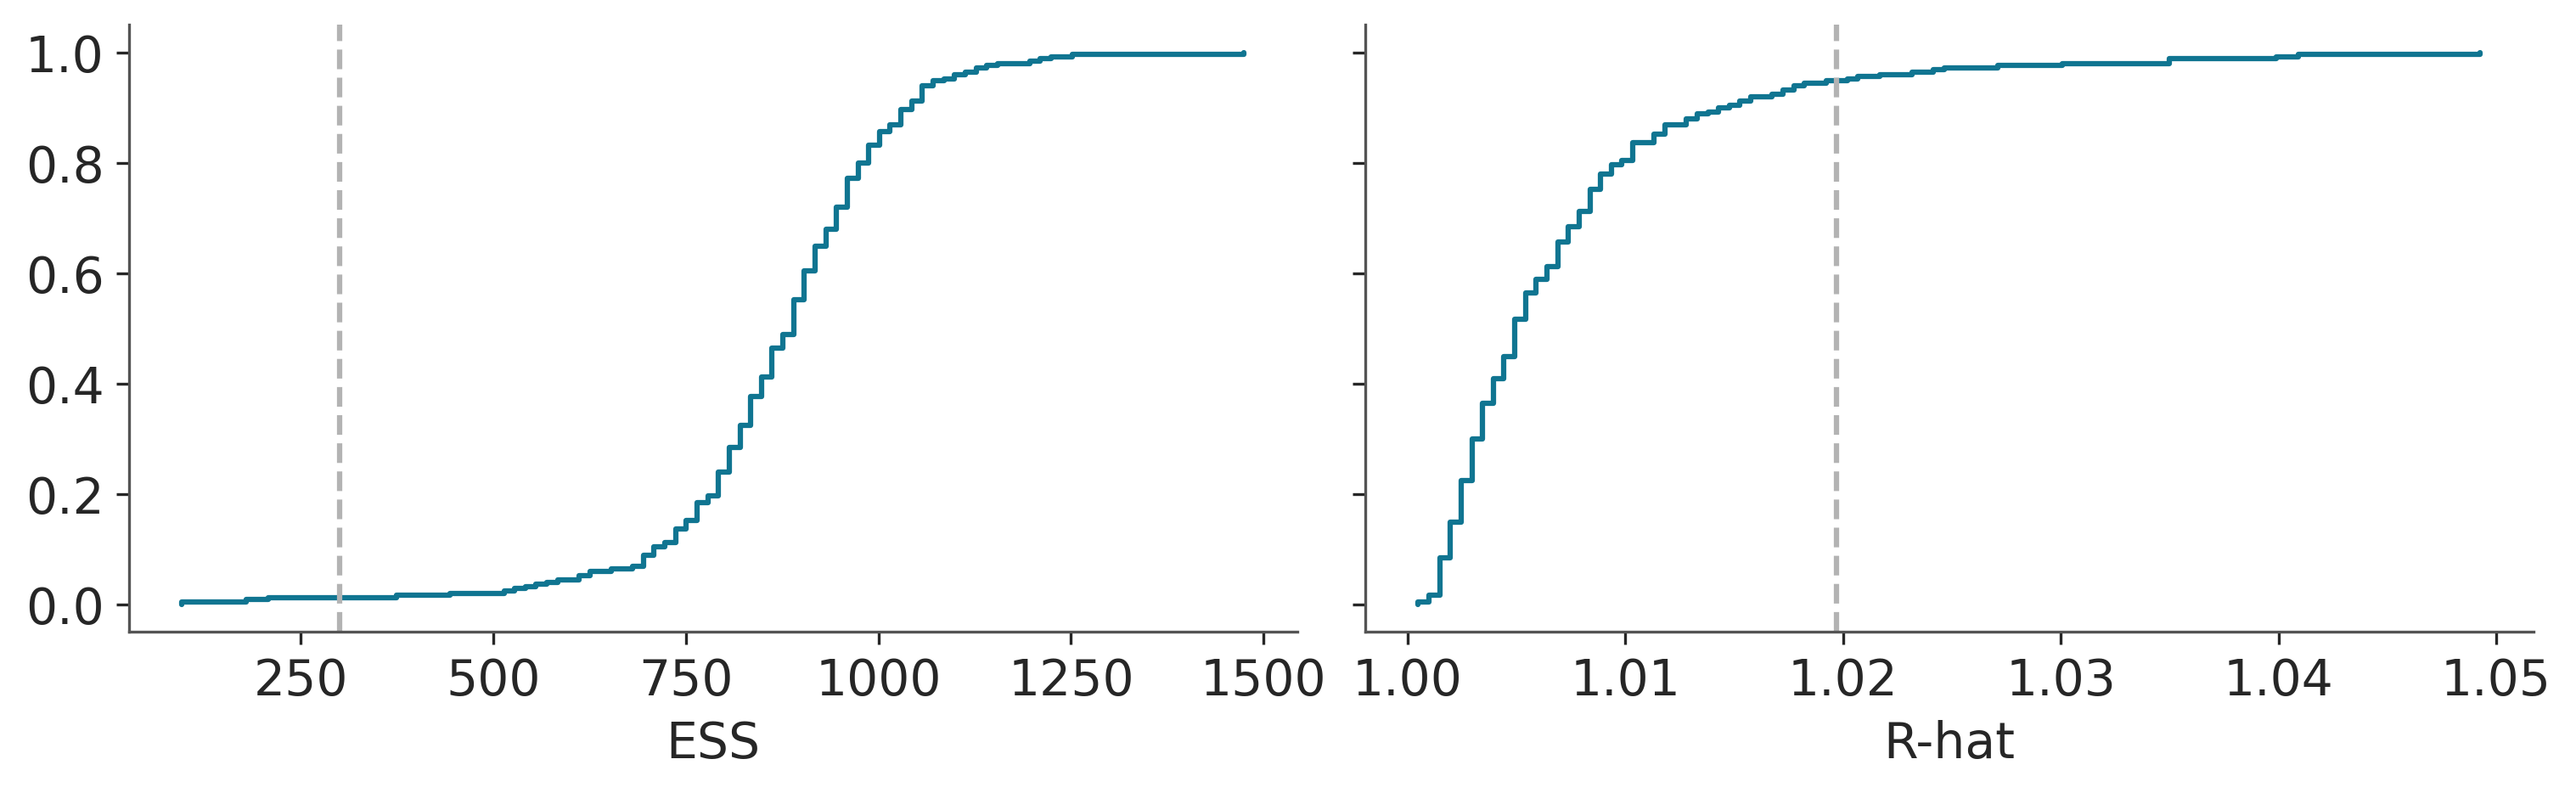

In [6]:
pmb.plot_convergence(idata_ZIP_reg, var_name="θ");

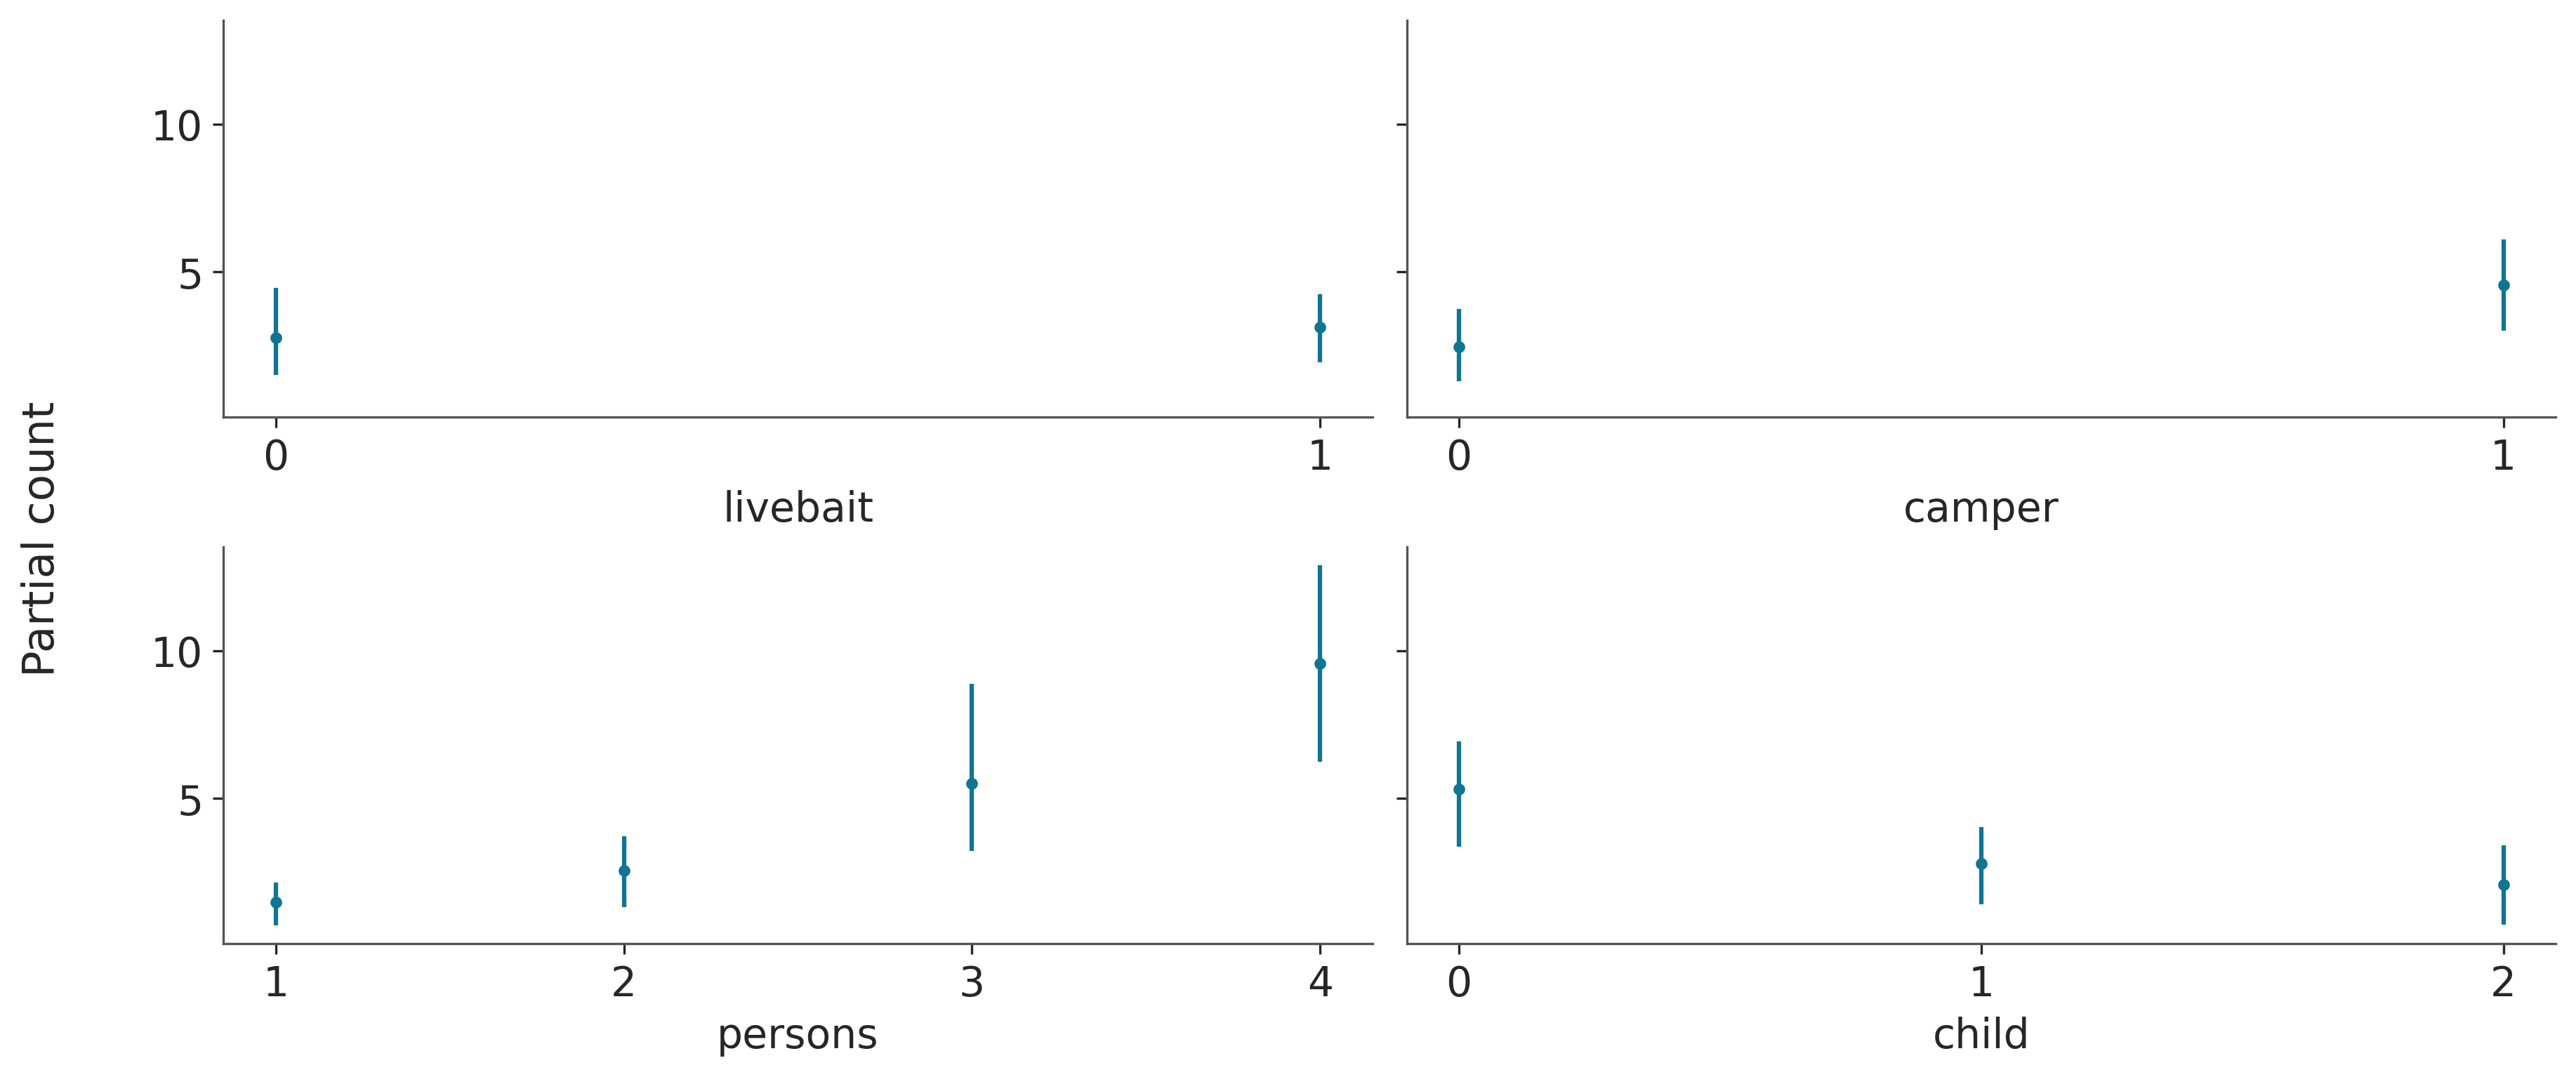

In [7]:
pmb.plot_pdp(θ, X=X, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

([2, 3, 1, 0], <Axes: ylabel='R²'>)

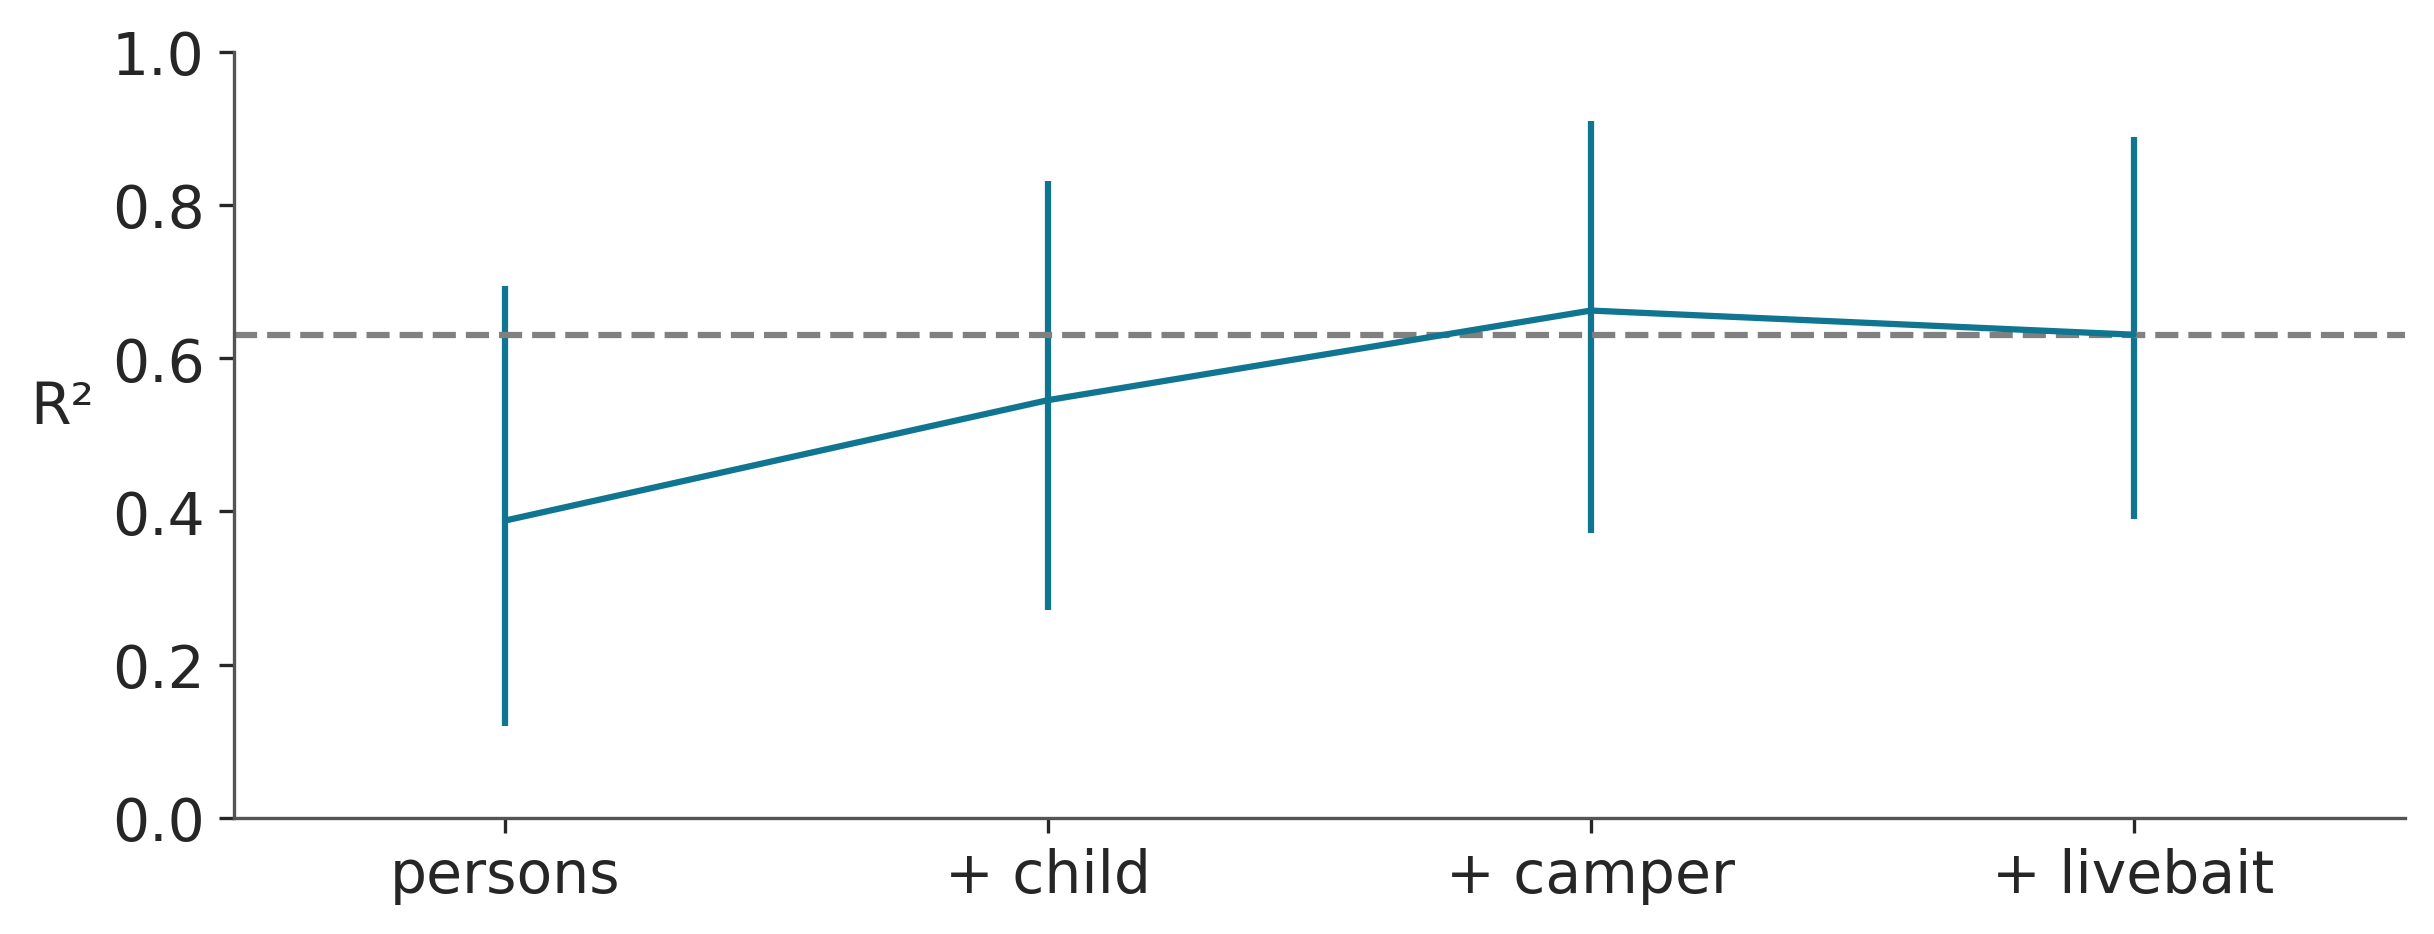

In [8]:
pmb.plot_variable_importance(idata_ZIP_reg, θ, X)
# plt.savefig("R_fish.png");

([2, 3, 1, 0], <Axes: ylabel='R²'>)

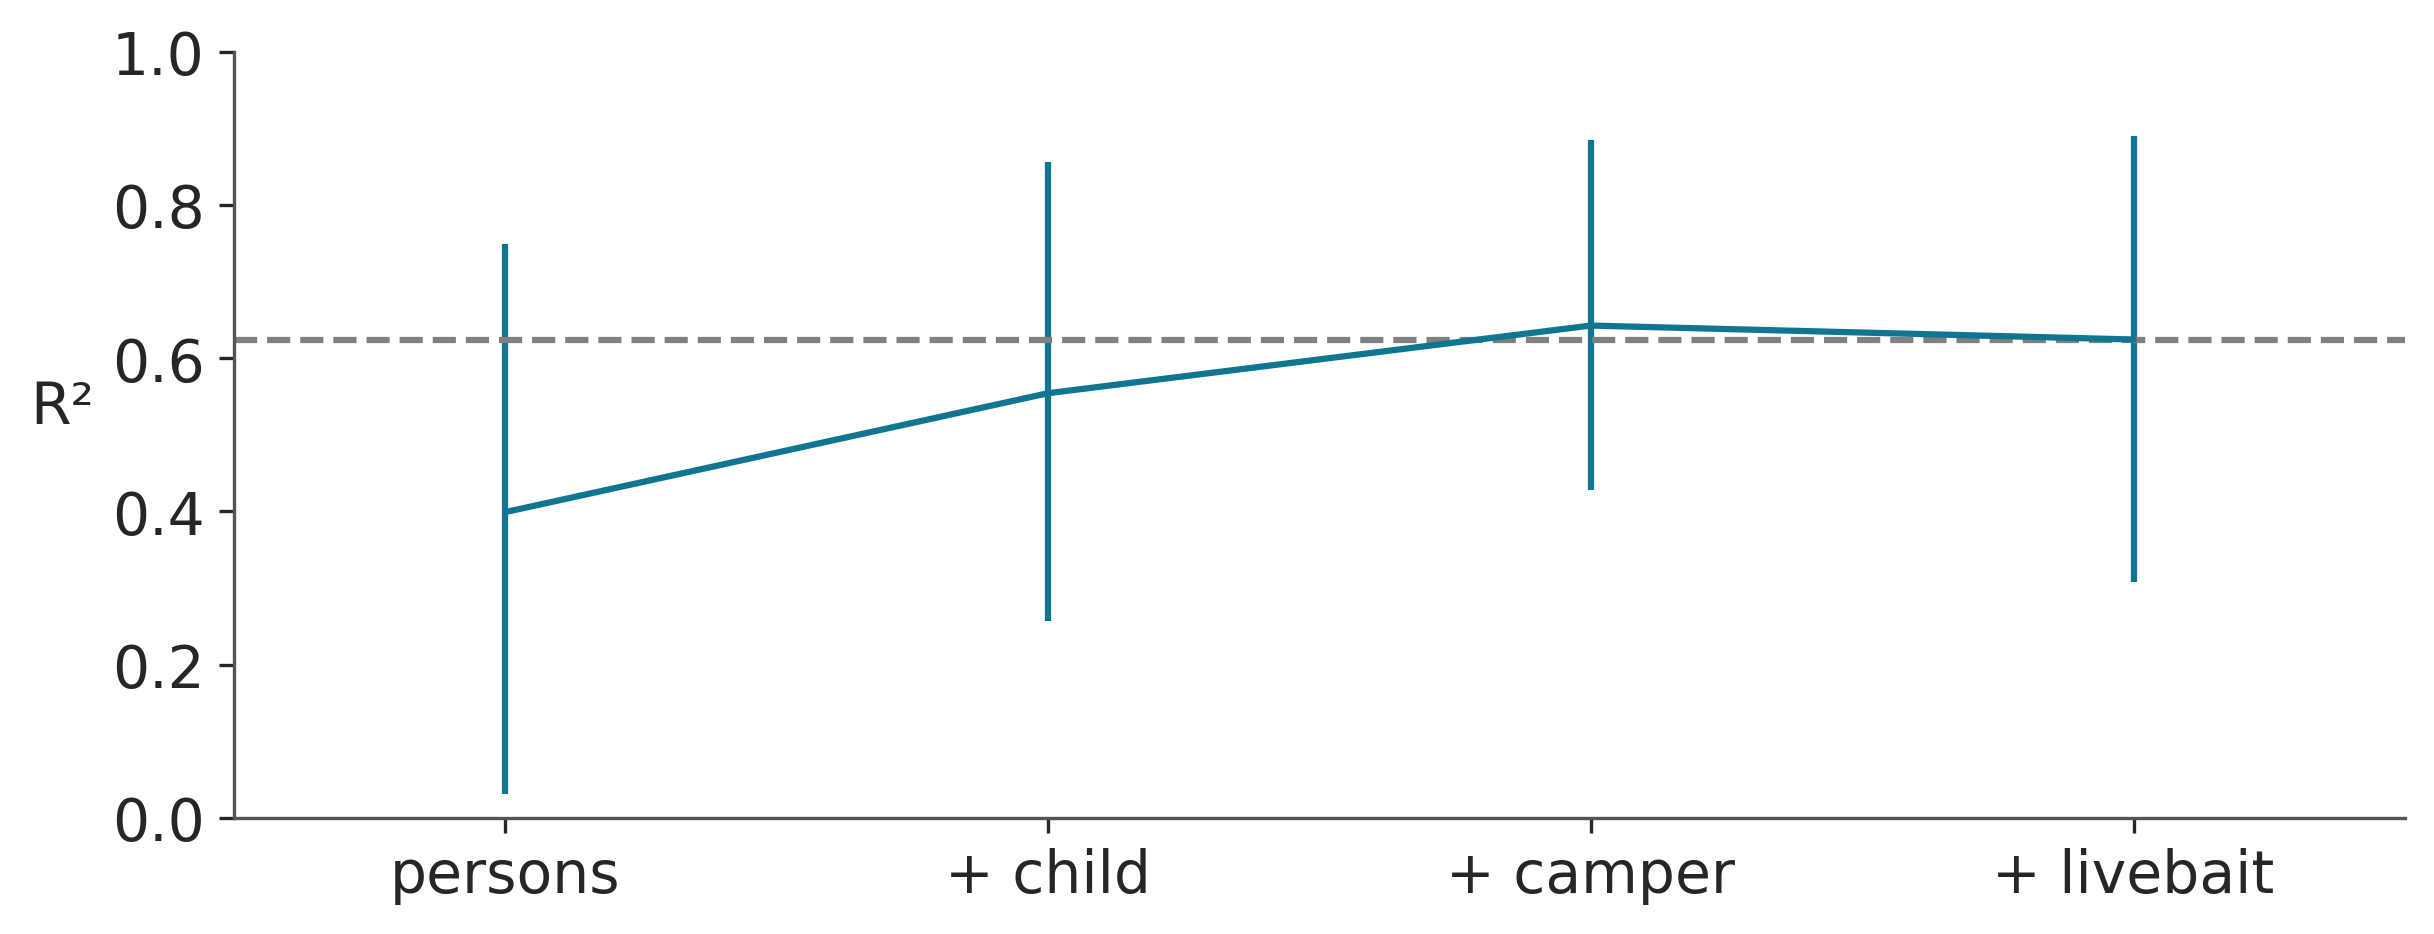

In [9]:
pmb.plot_variable_importance(idata_ZIP_reg, θ, X, method="backward")

### With 200 trees  

In [10]:
with pm.Model() as ZIP_reg_200:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X, np.log(Y + 1), m=200)
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg_200 = pm.sample(draws=2000, tune=2000, chains=4, random_seed=123)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 770 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


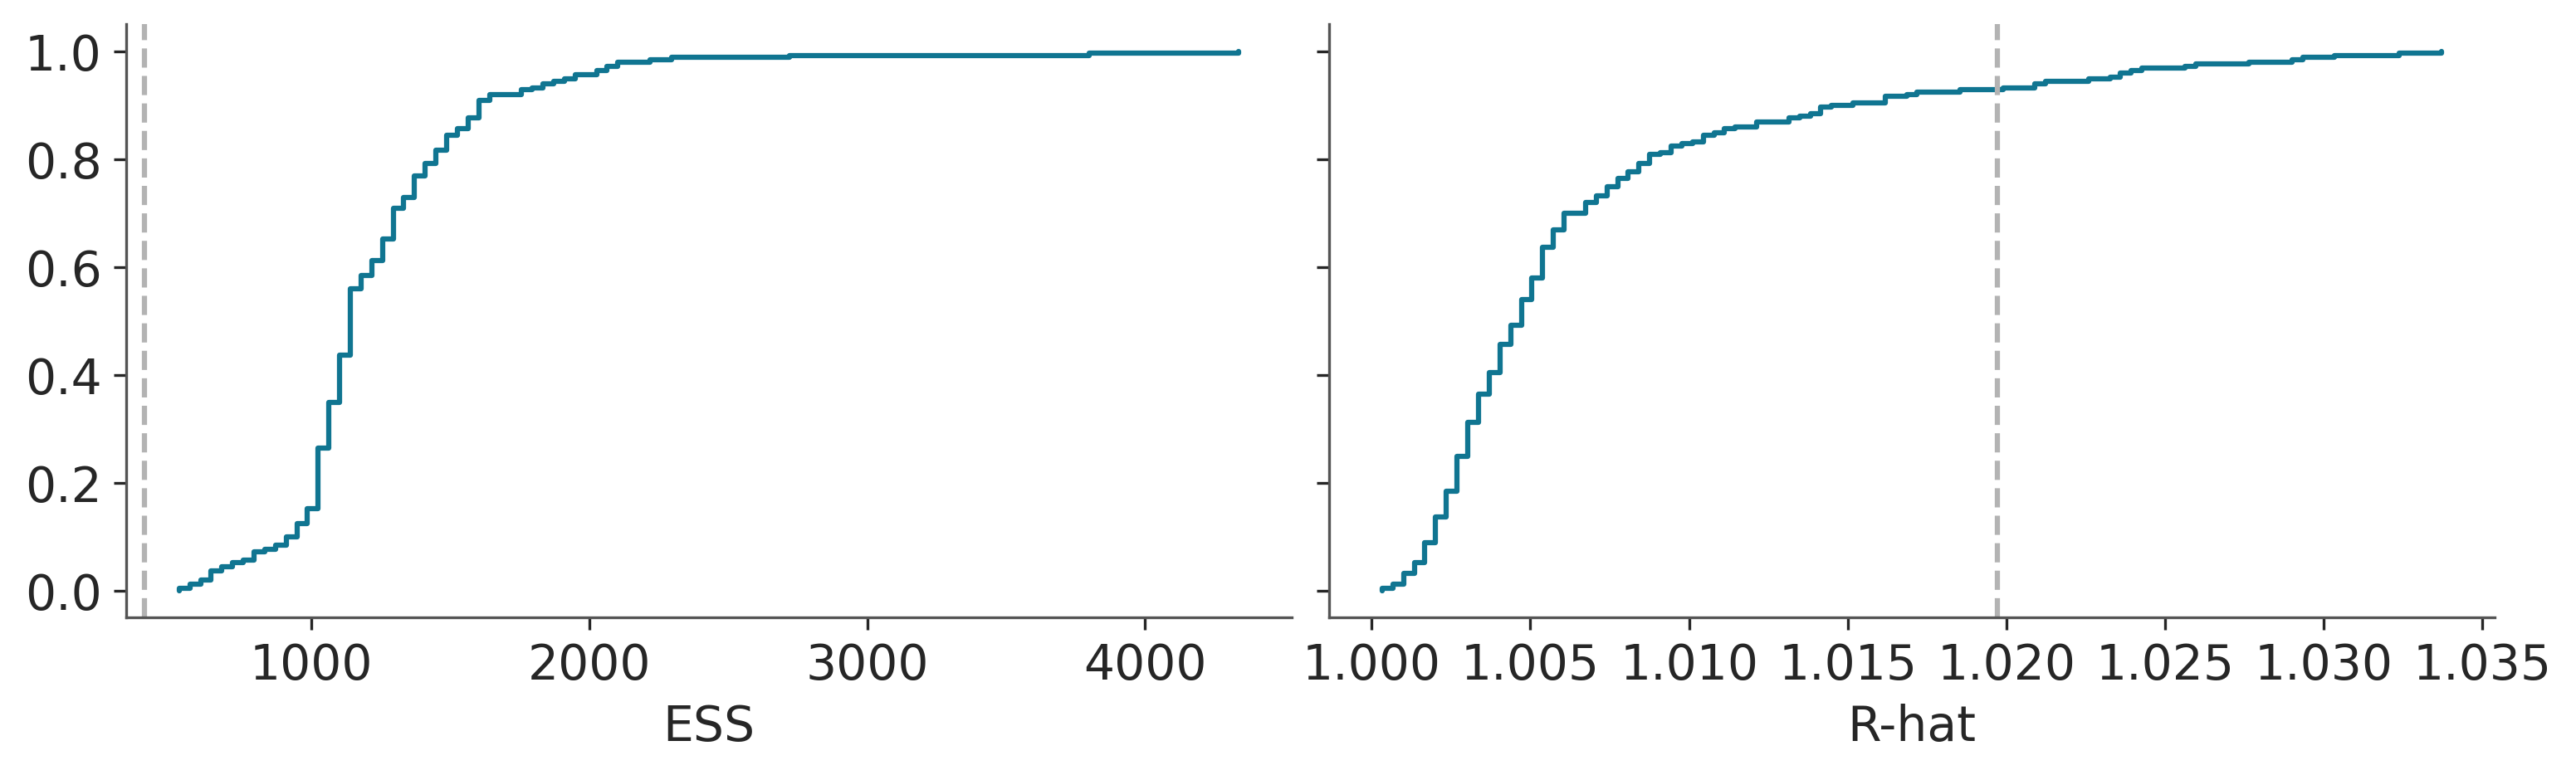

In [11]:
pmb.plot_convergence(idata_ZIP_reg_200, var_name="θ");

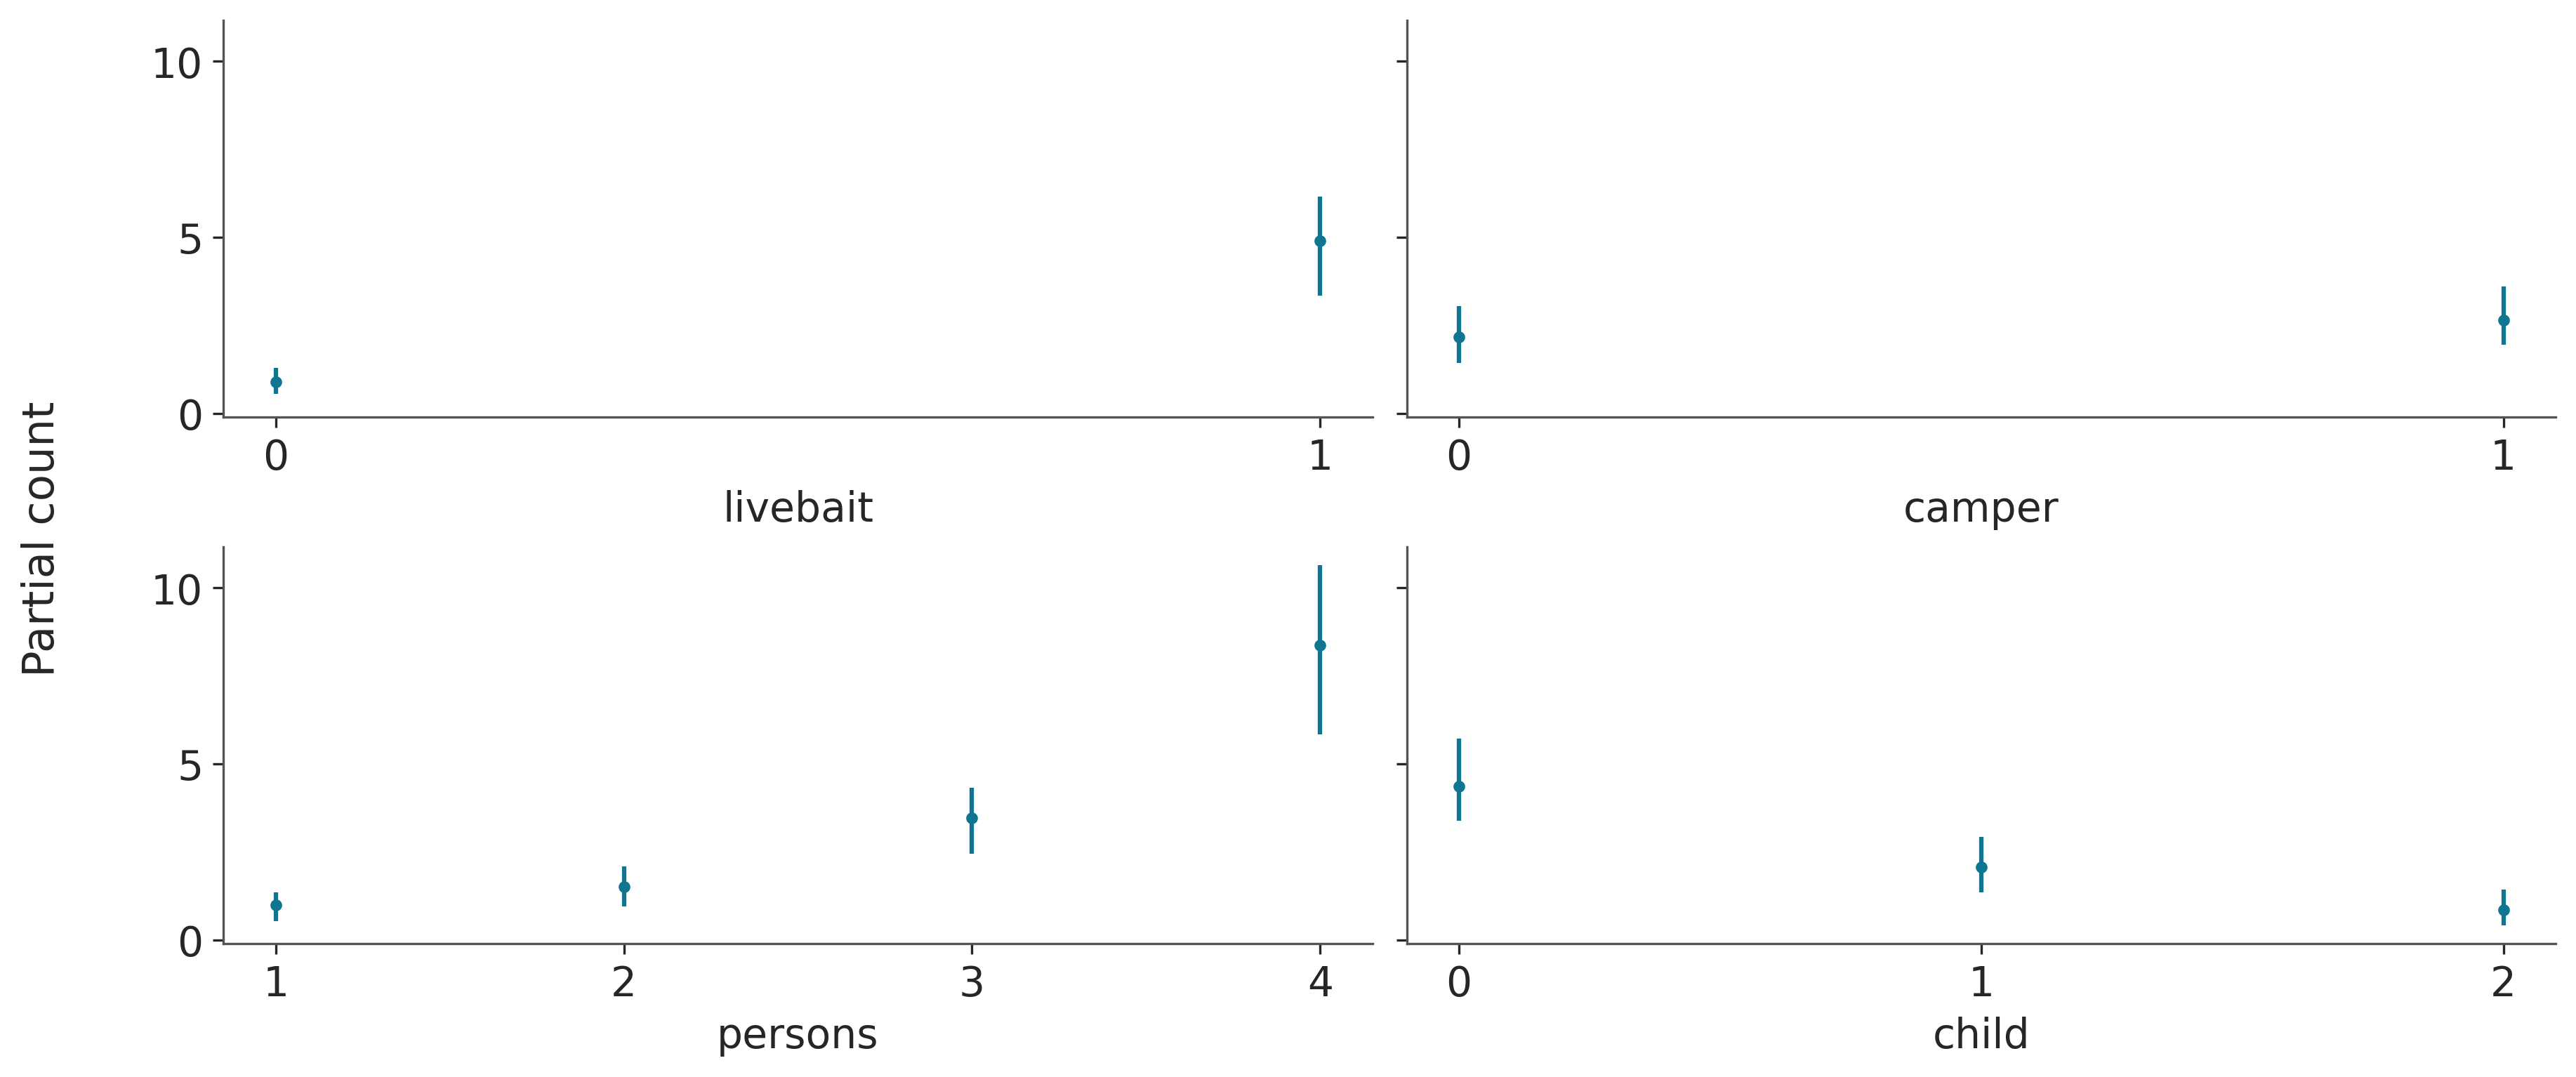

In [12]:
pmb.plot_pdp(θ, X=X, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

([1, 3, 2, 0], <Axes: ylabel='R²'>)

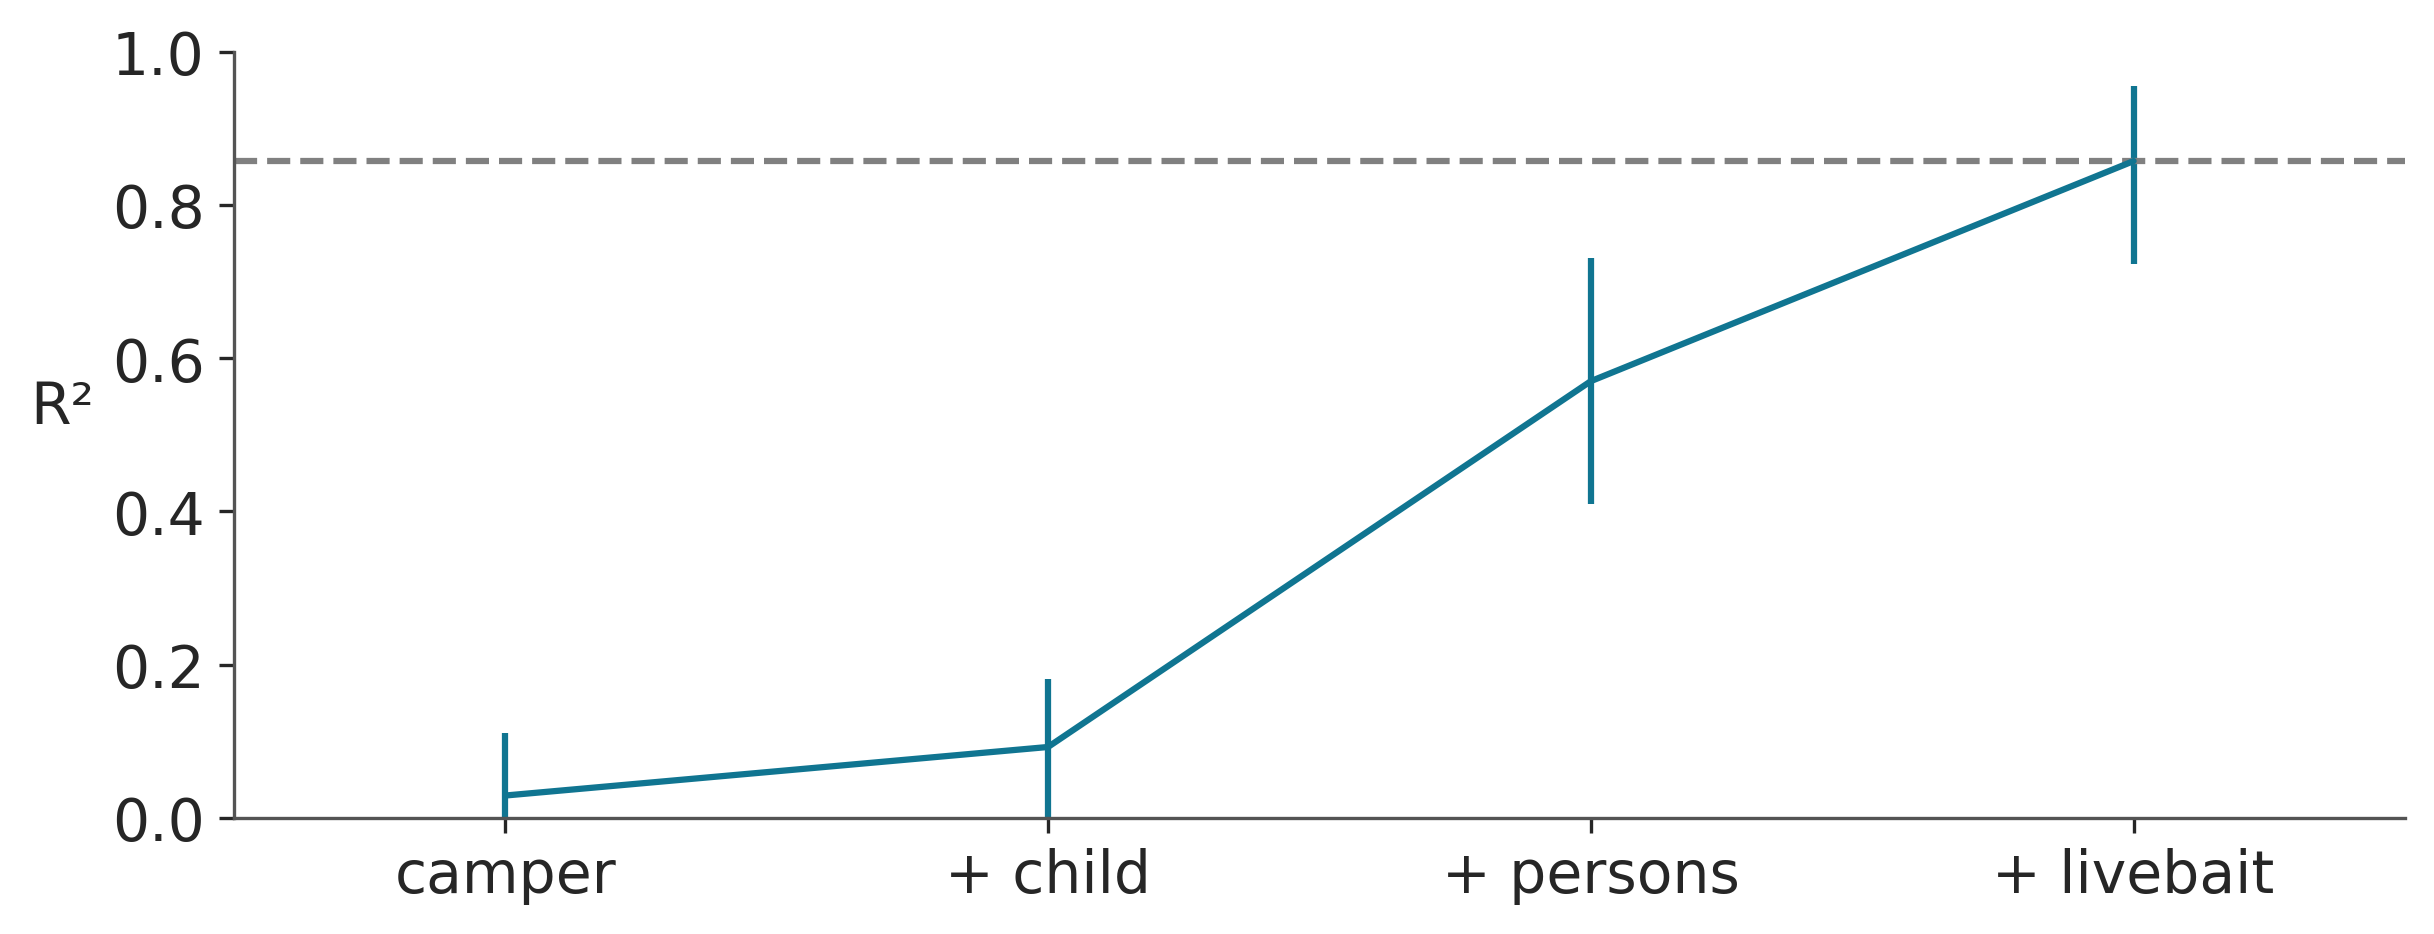

In [13]:
pmb.plot_variable_importance(idata_ZIP_reg_200, θ, X)

([3, 2, 0, 1], <Axes: ylabel='R²'>)

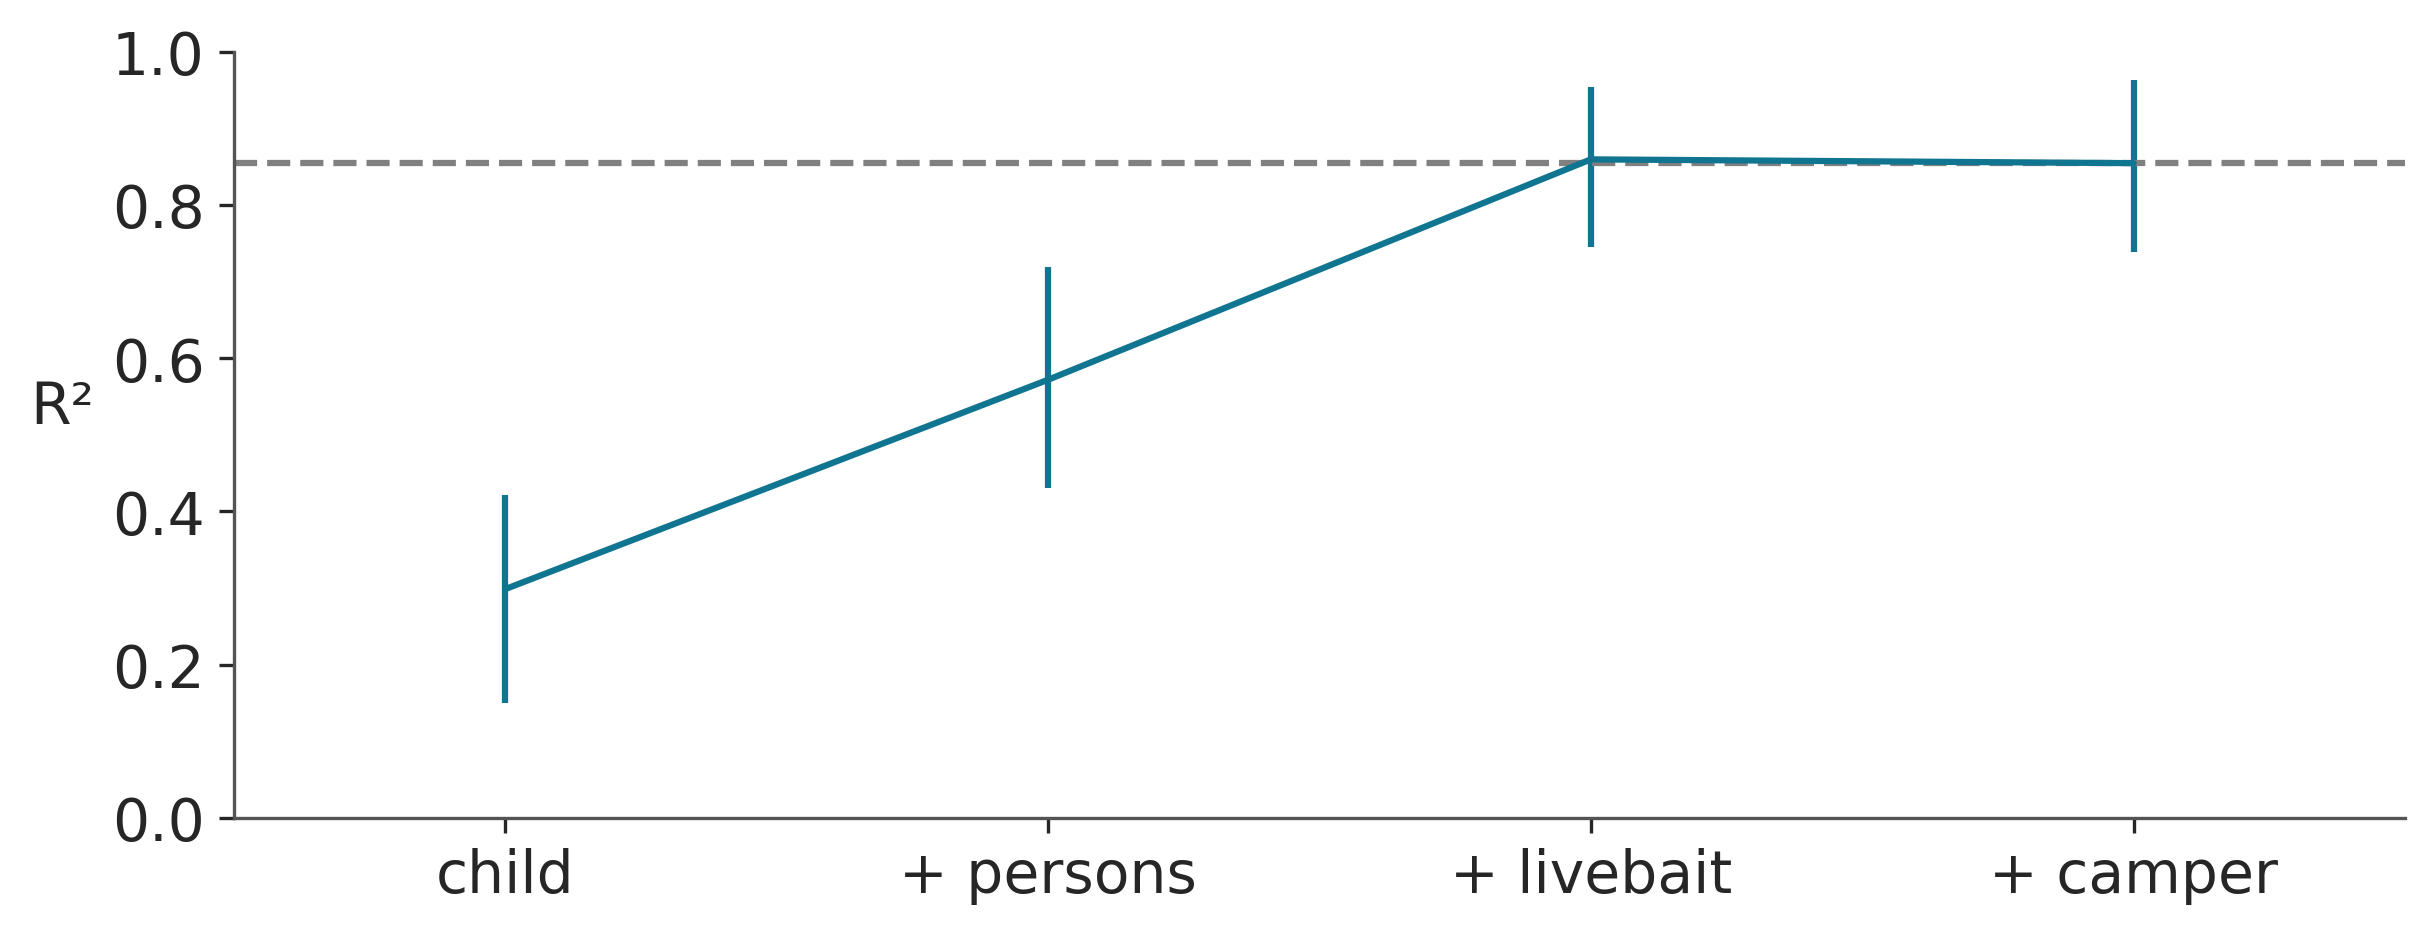

In [14]:
pmb.plot_variable_importance(idata_ZIP_reg_200, θ, X, method="backward")

## Reorder variables

In [15]:
fish_data["adults"] = fish_data["persons"] - fish_data["child"]

In [16]:
fish_data.head()

,nofish,livebait,camper,persons,child,count,adults
0,1,0,0,1,0,0,1
1,0,1,1,1,0,0,1
2,0,1,0,1,0,0,1
3,0,1,1,2,1,0,1
4,0,1,0,1,0,1,1


In [17]:
X2 = fish_data.drop(columns=["count", "nofish", "persons"])

In [18]:
with pm.Model() as ZIP_reg2:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X2, np.log(Y + 1))
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg2 = pm.sample(draws=2000, tune=2000, random_seed=123)

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 100 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


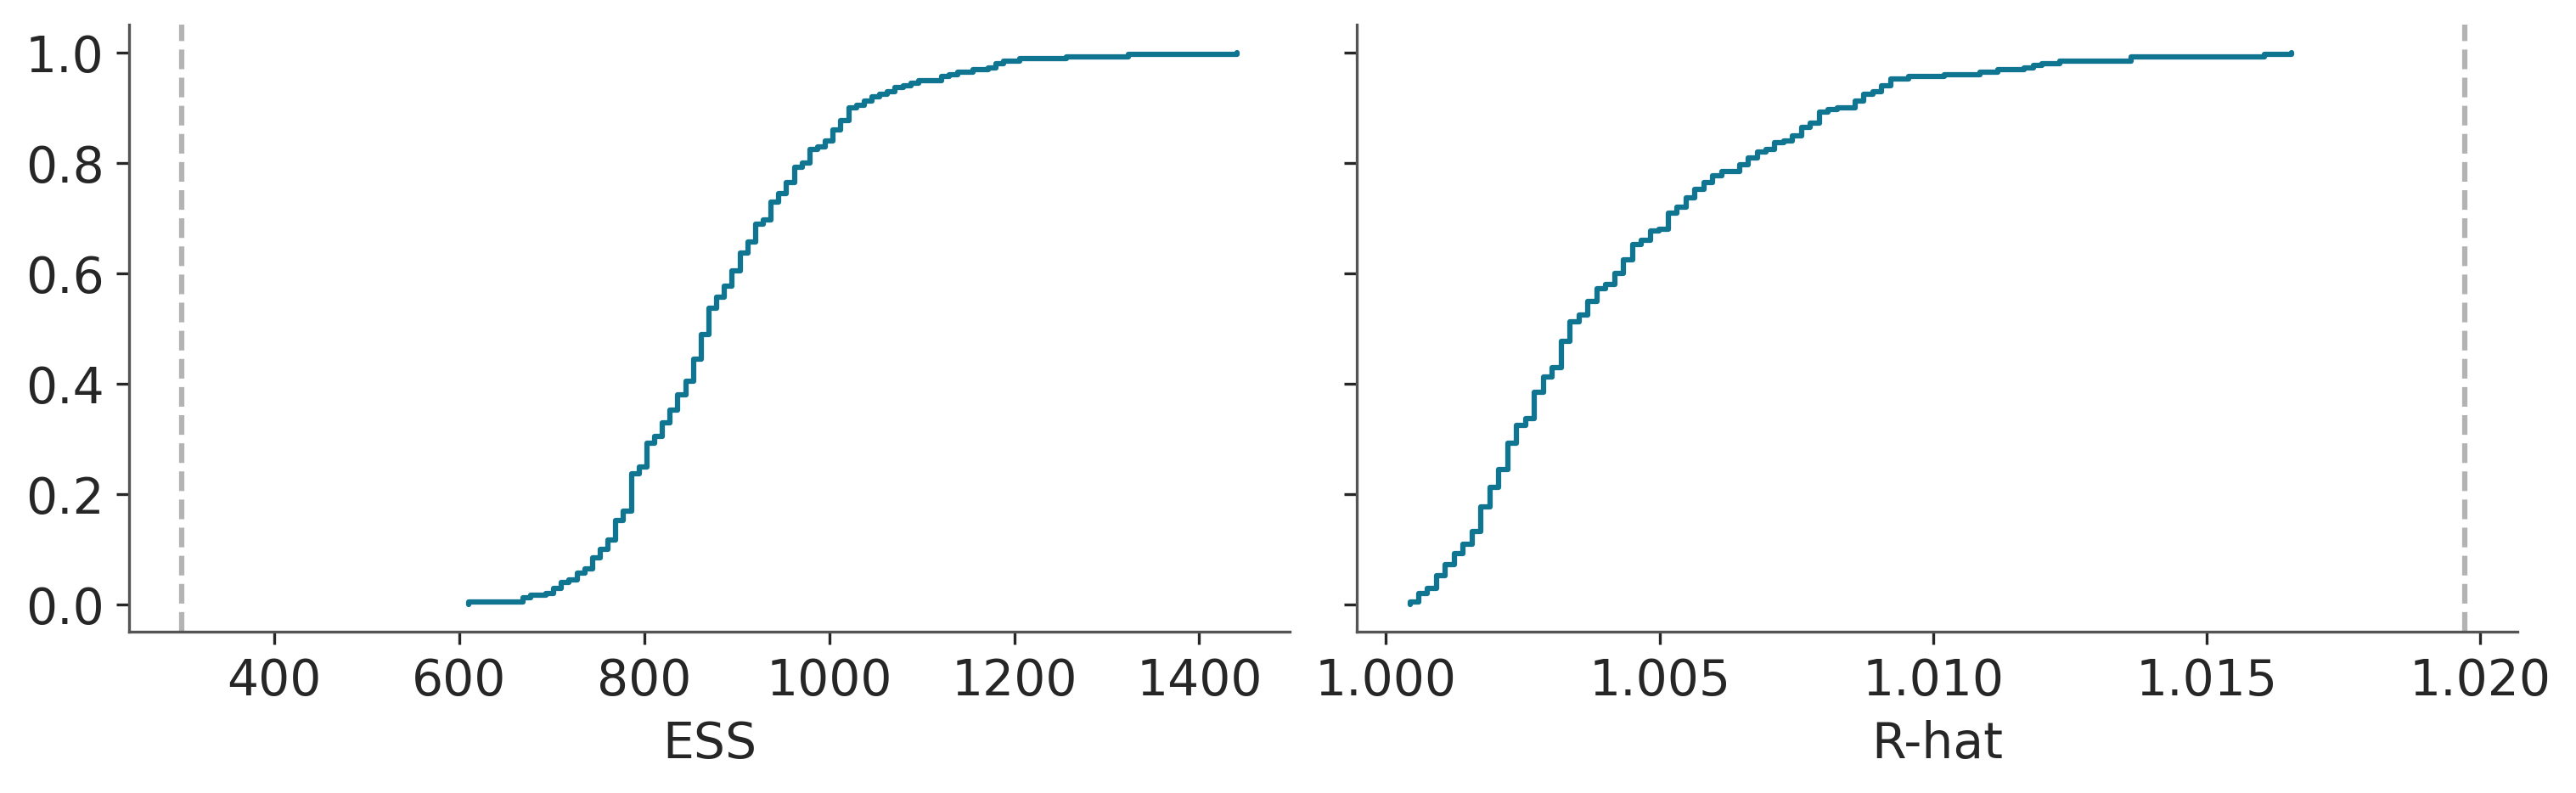

In [19]:
pmb.plot_convergence(idata_ZIP_reg2, var_name="θ");

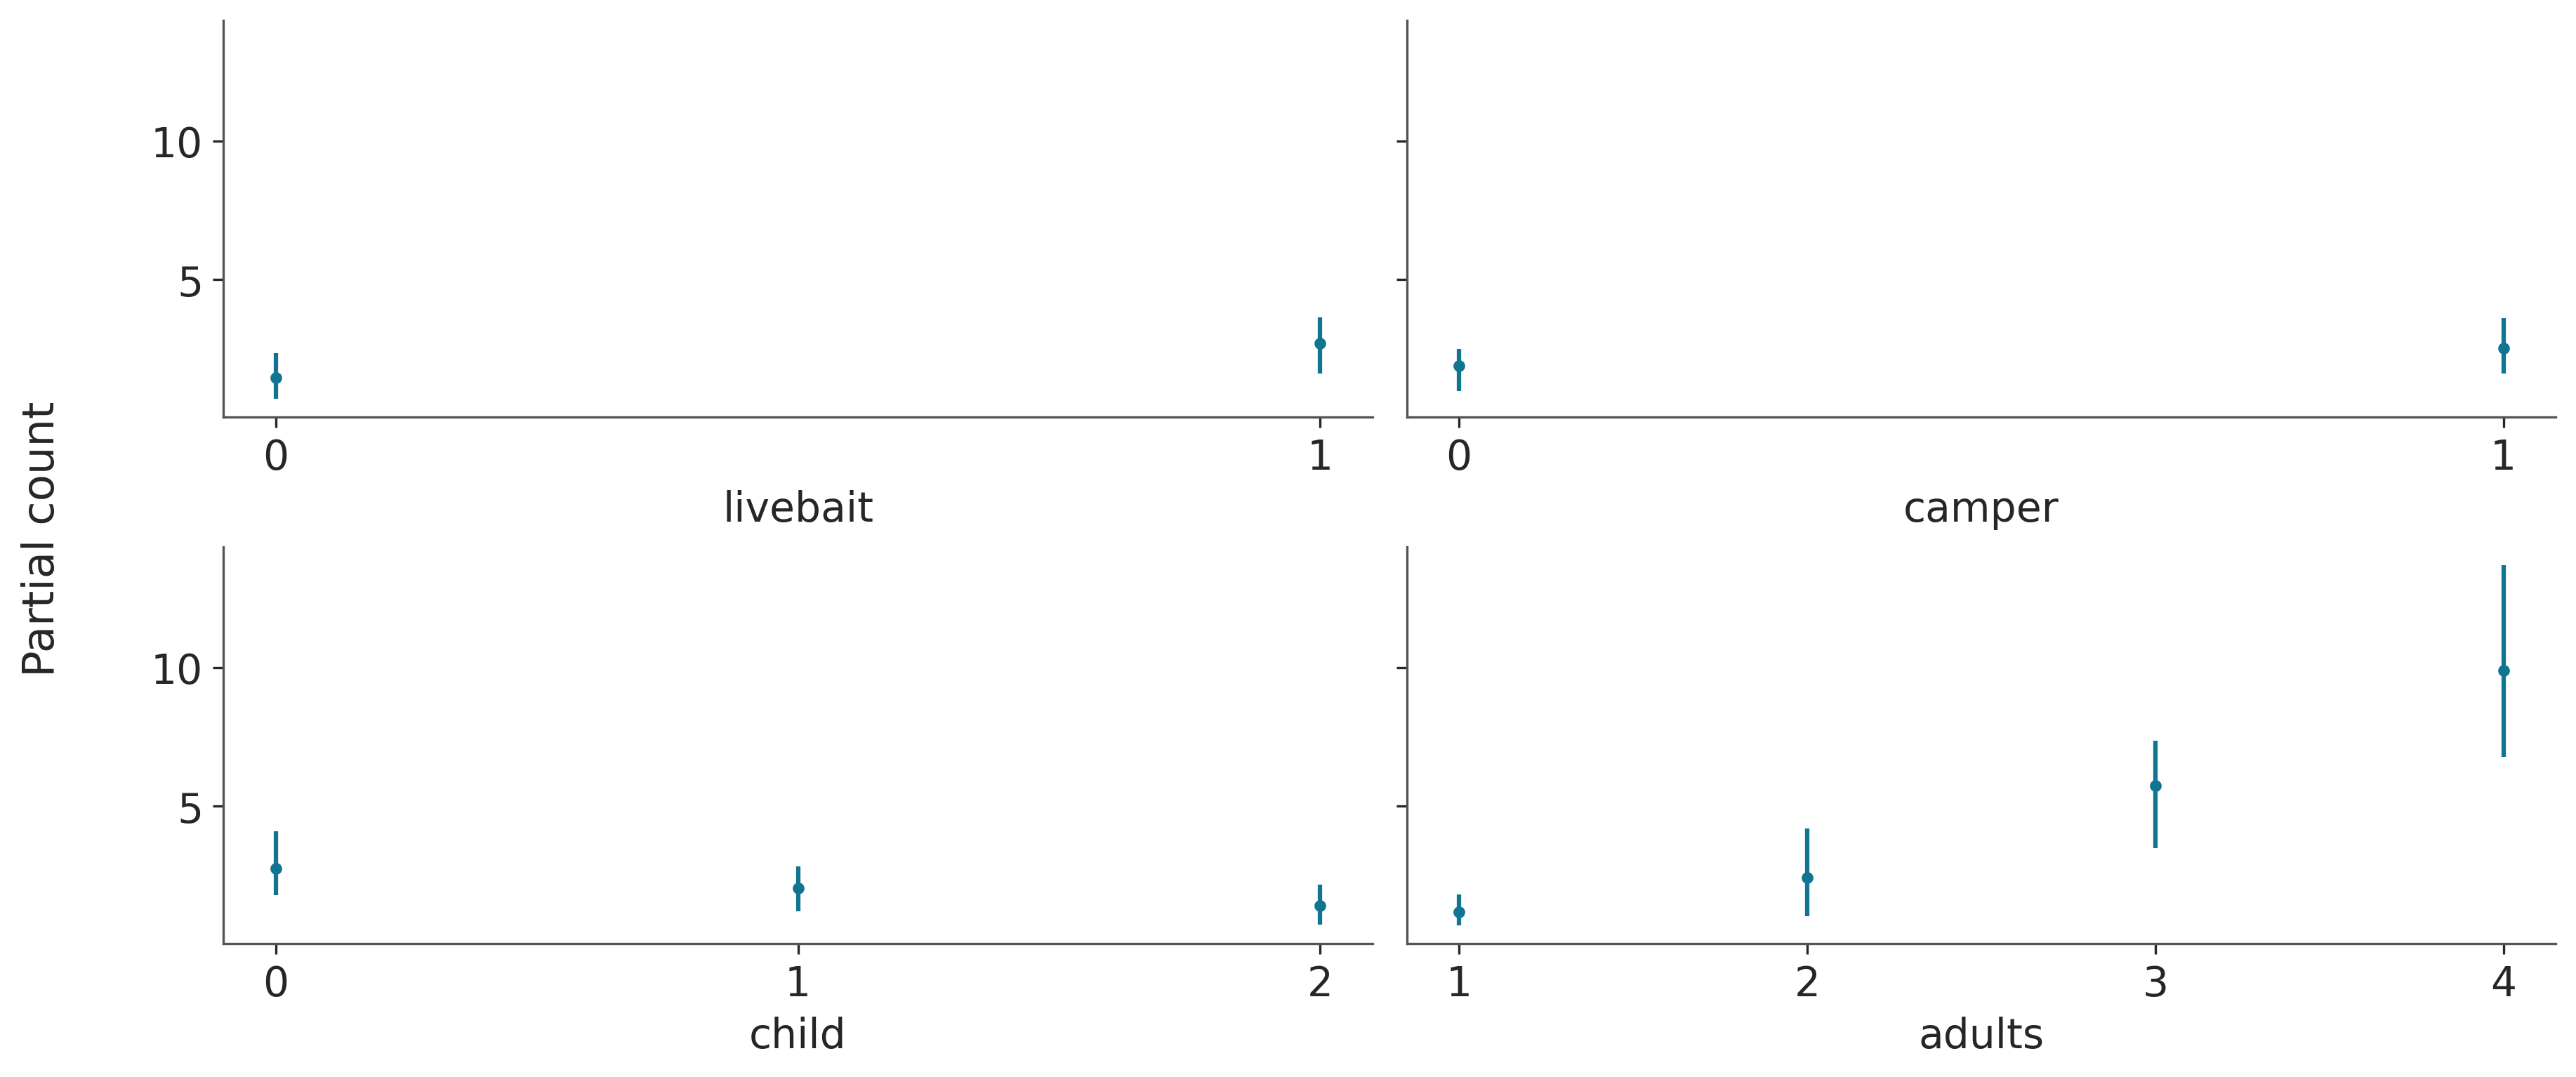

In [20]:
pmb.plot_pdp(θ, X=X2, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

([3, 1, 0, 2], <Axes: ylabel='R²'>)

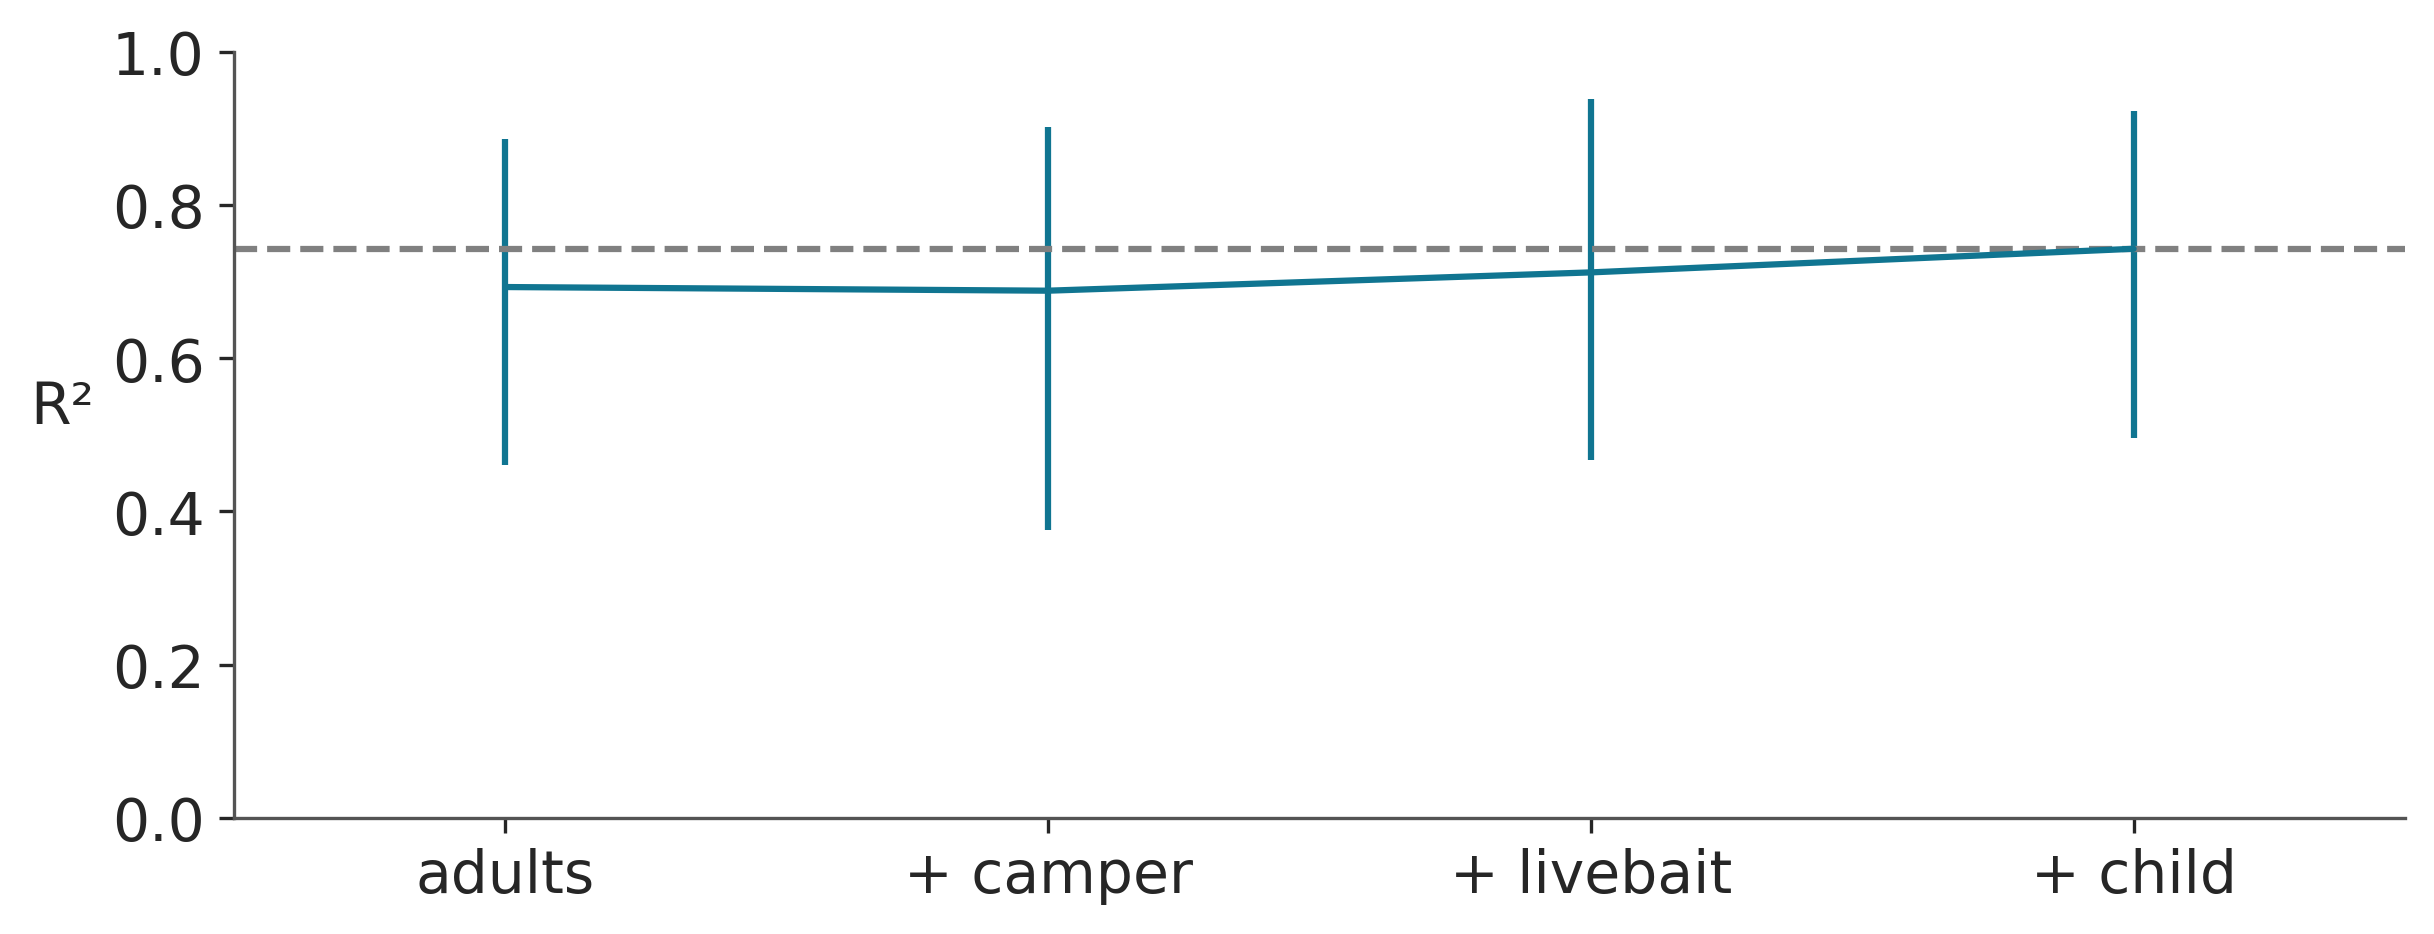

In [21]:
pmb.plot_variable_importance(idata_ZIP_reg2, θ, X2)
# plt.savefig("R_fish.png");

([3, 0, 2, 1], <Axes: ylabel='R²'>)

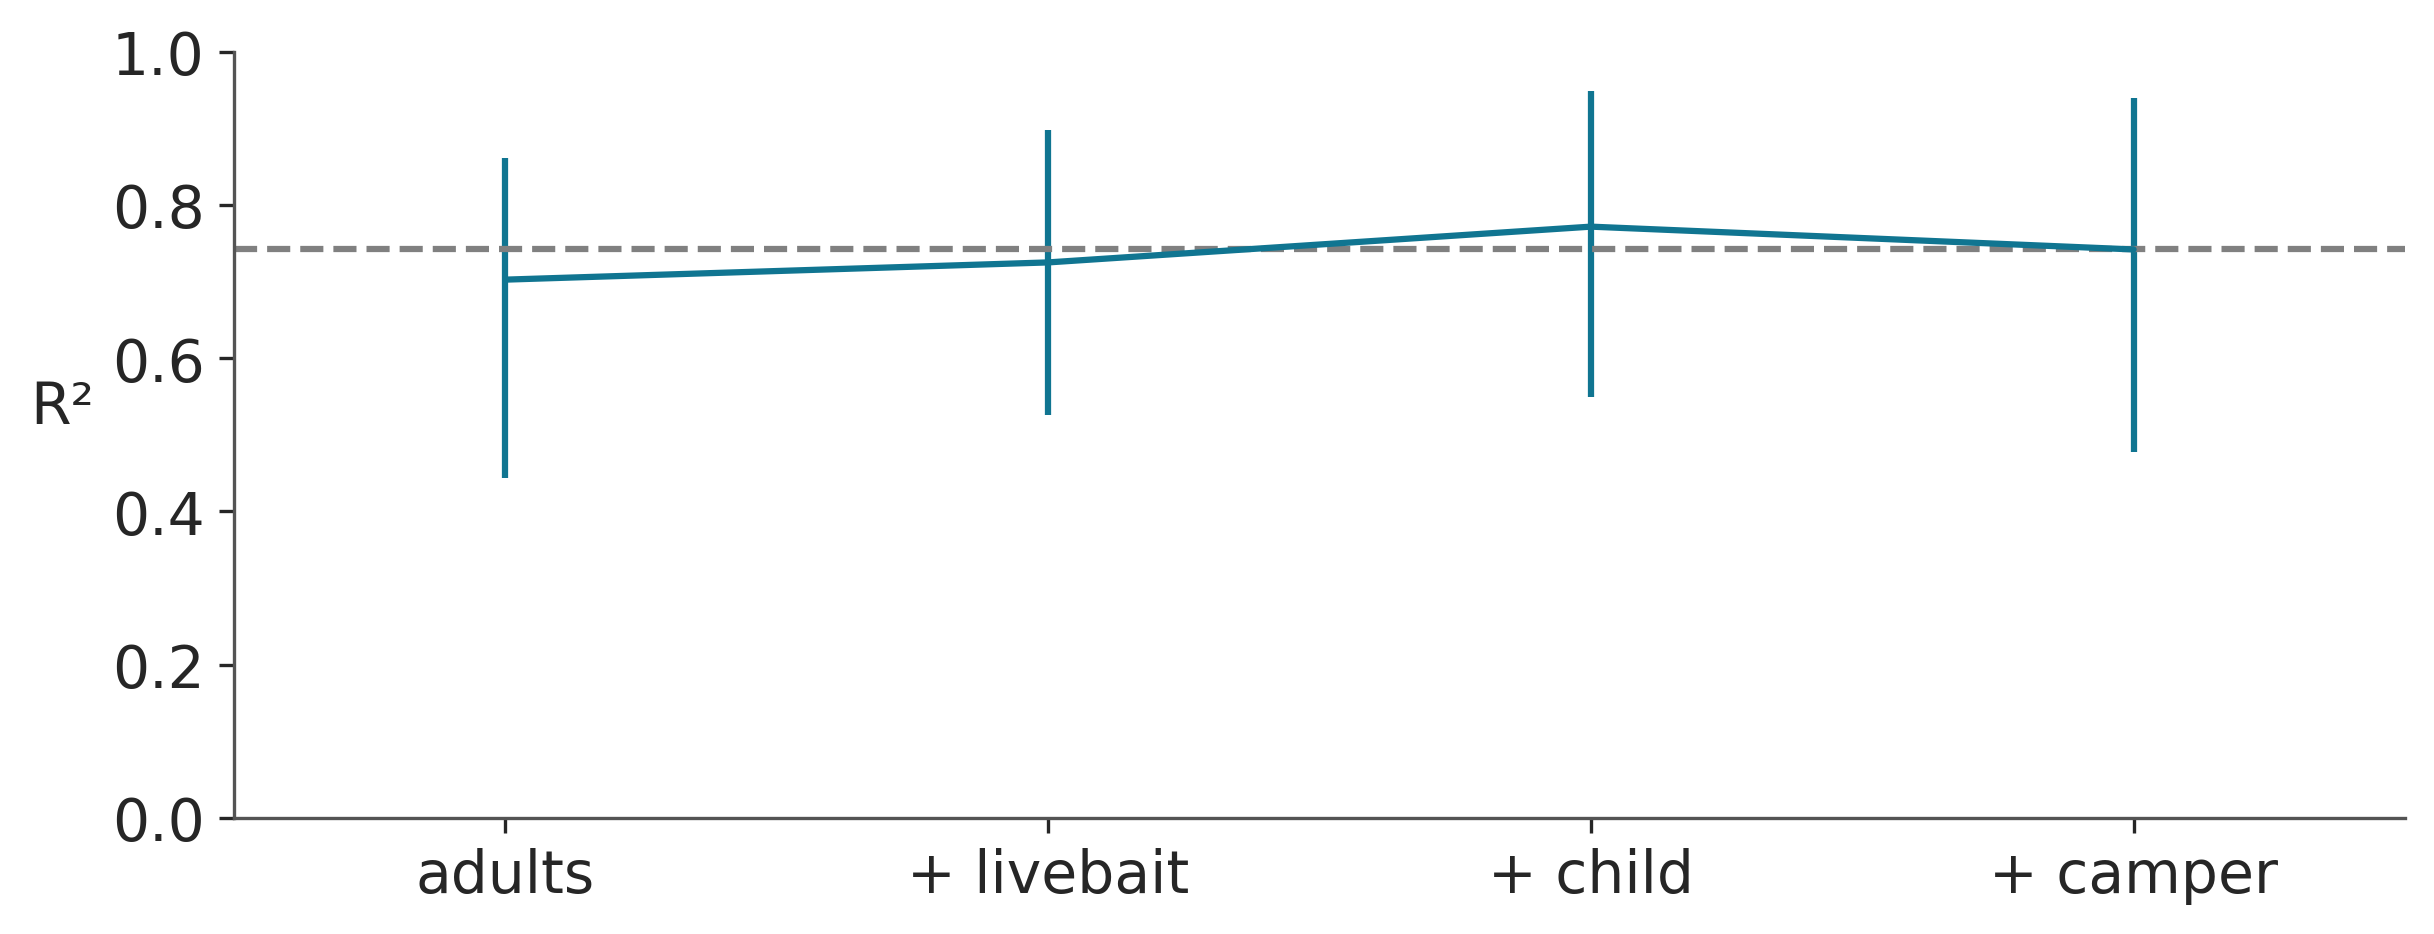

In [22]:
pmb.plot_variable_importance(idata_ZIP_reg2, θ, X2, method="backward")

### With 200 trees

In [23]:
with pm.Model() as ZIP_reg2_200:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X2, np.log(Y + 1), m=200)
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg2_200 = pm.sample(draws=2000, tune=2000, random_seed=123)

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Sampling 3 chains for 2_000 tune and 2_000 draw iterations (6_000 + 6_000 draws total) took 389 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


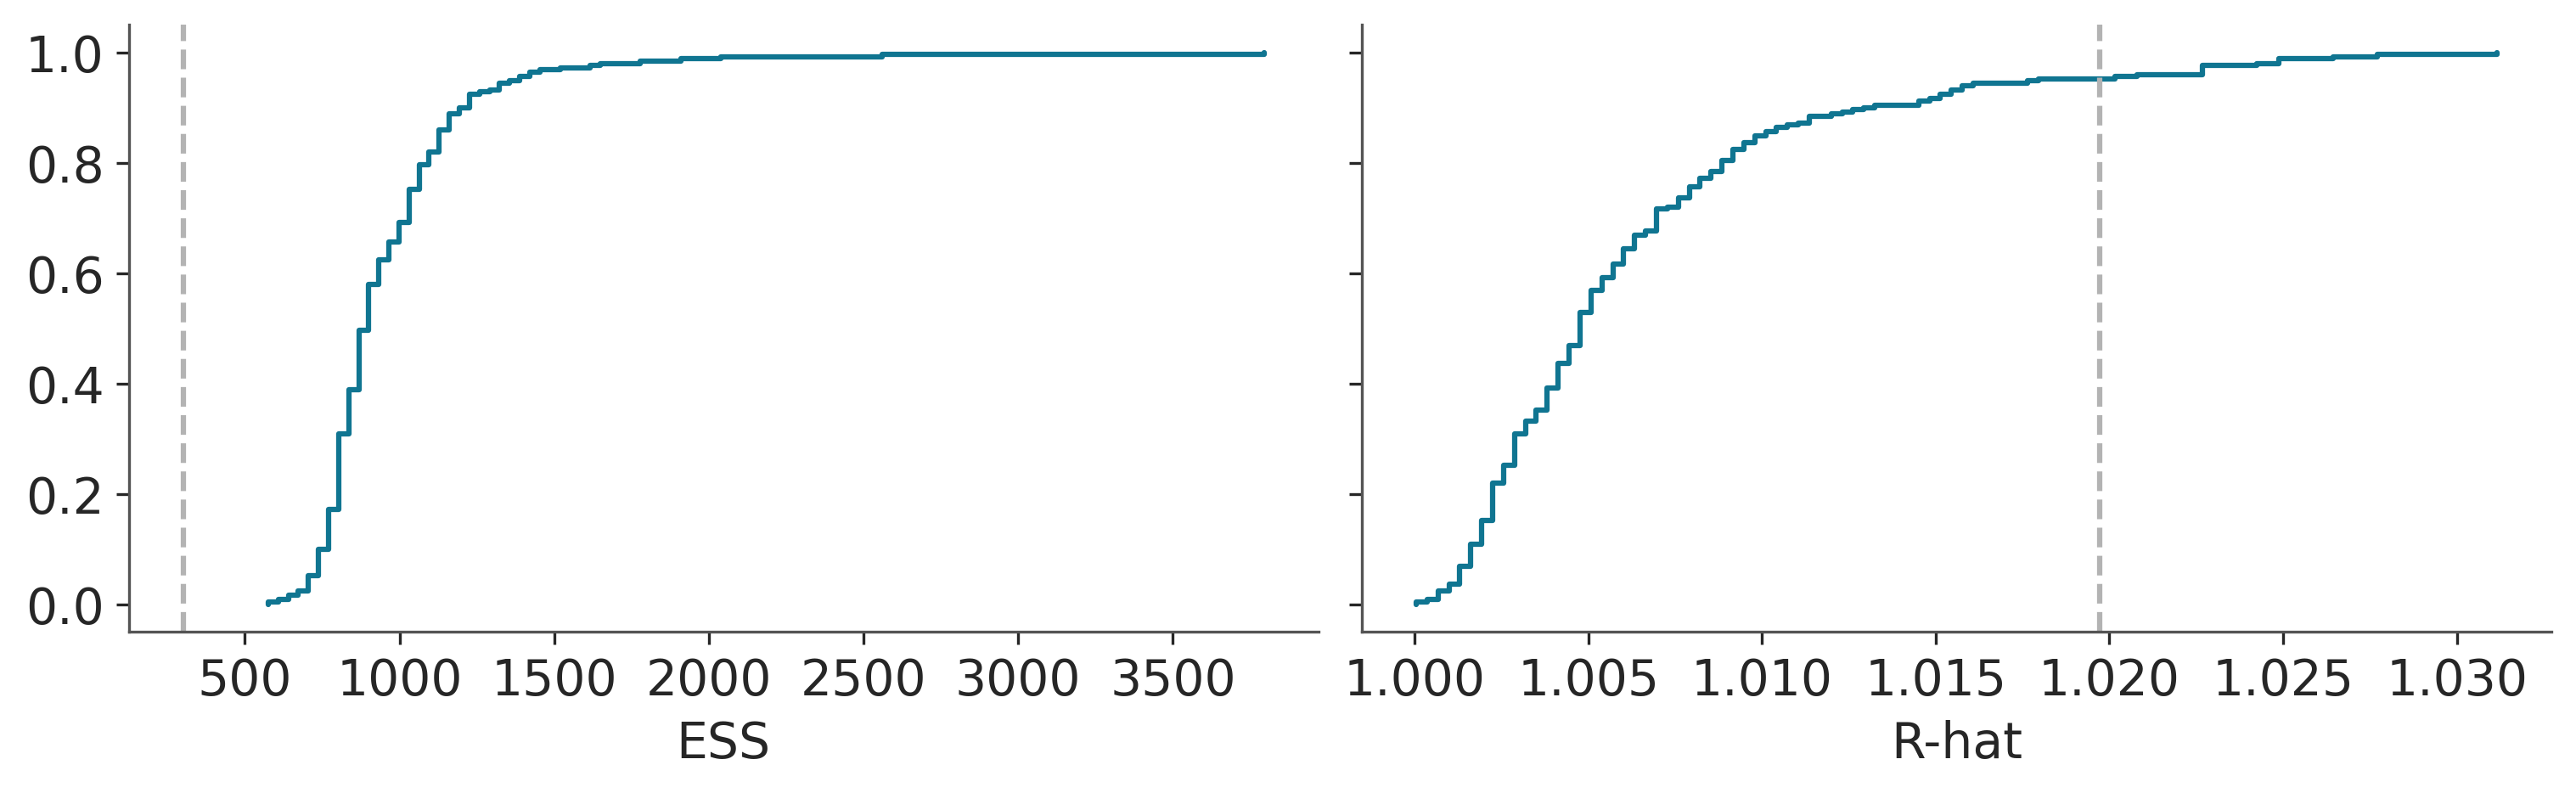

In [24]:
pmb.plot_convergence(idata_ZIP_reg2_200, var_name="θ");

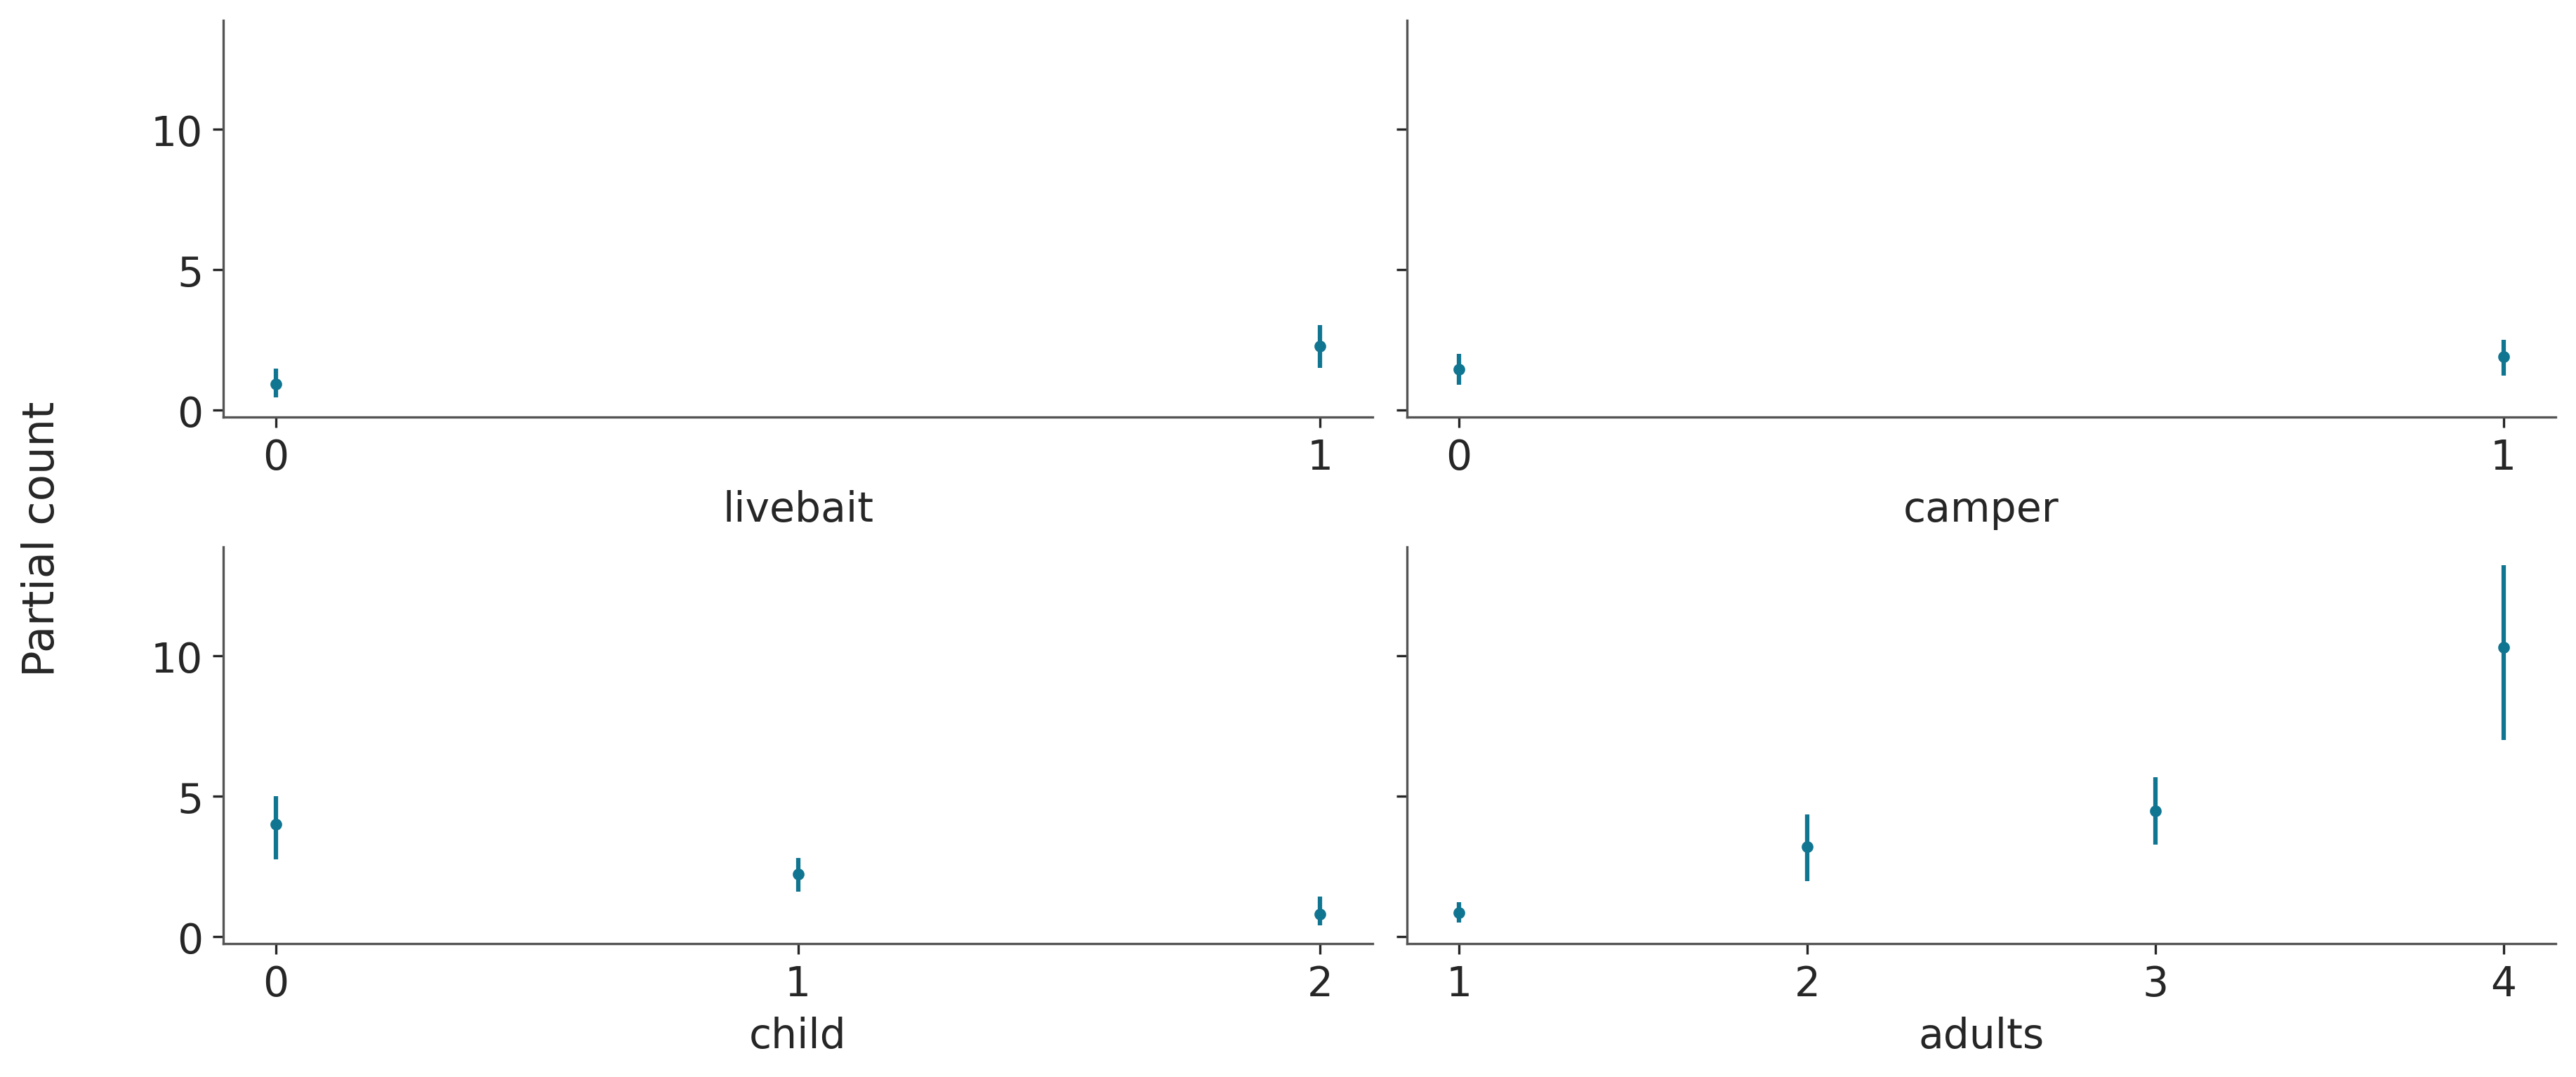

In [25]:
pmb.plot_pdp(θ, X=X2, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

([3, 0, 2, 1], <Axes: ylabel='R²'>)

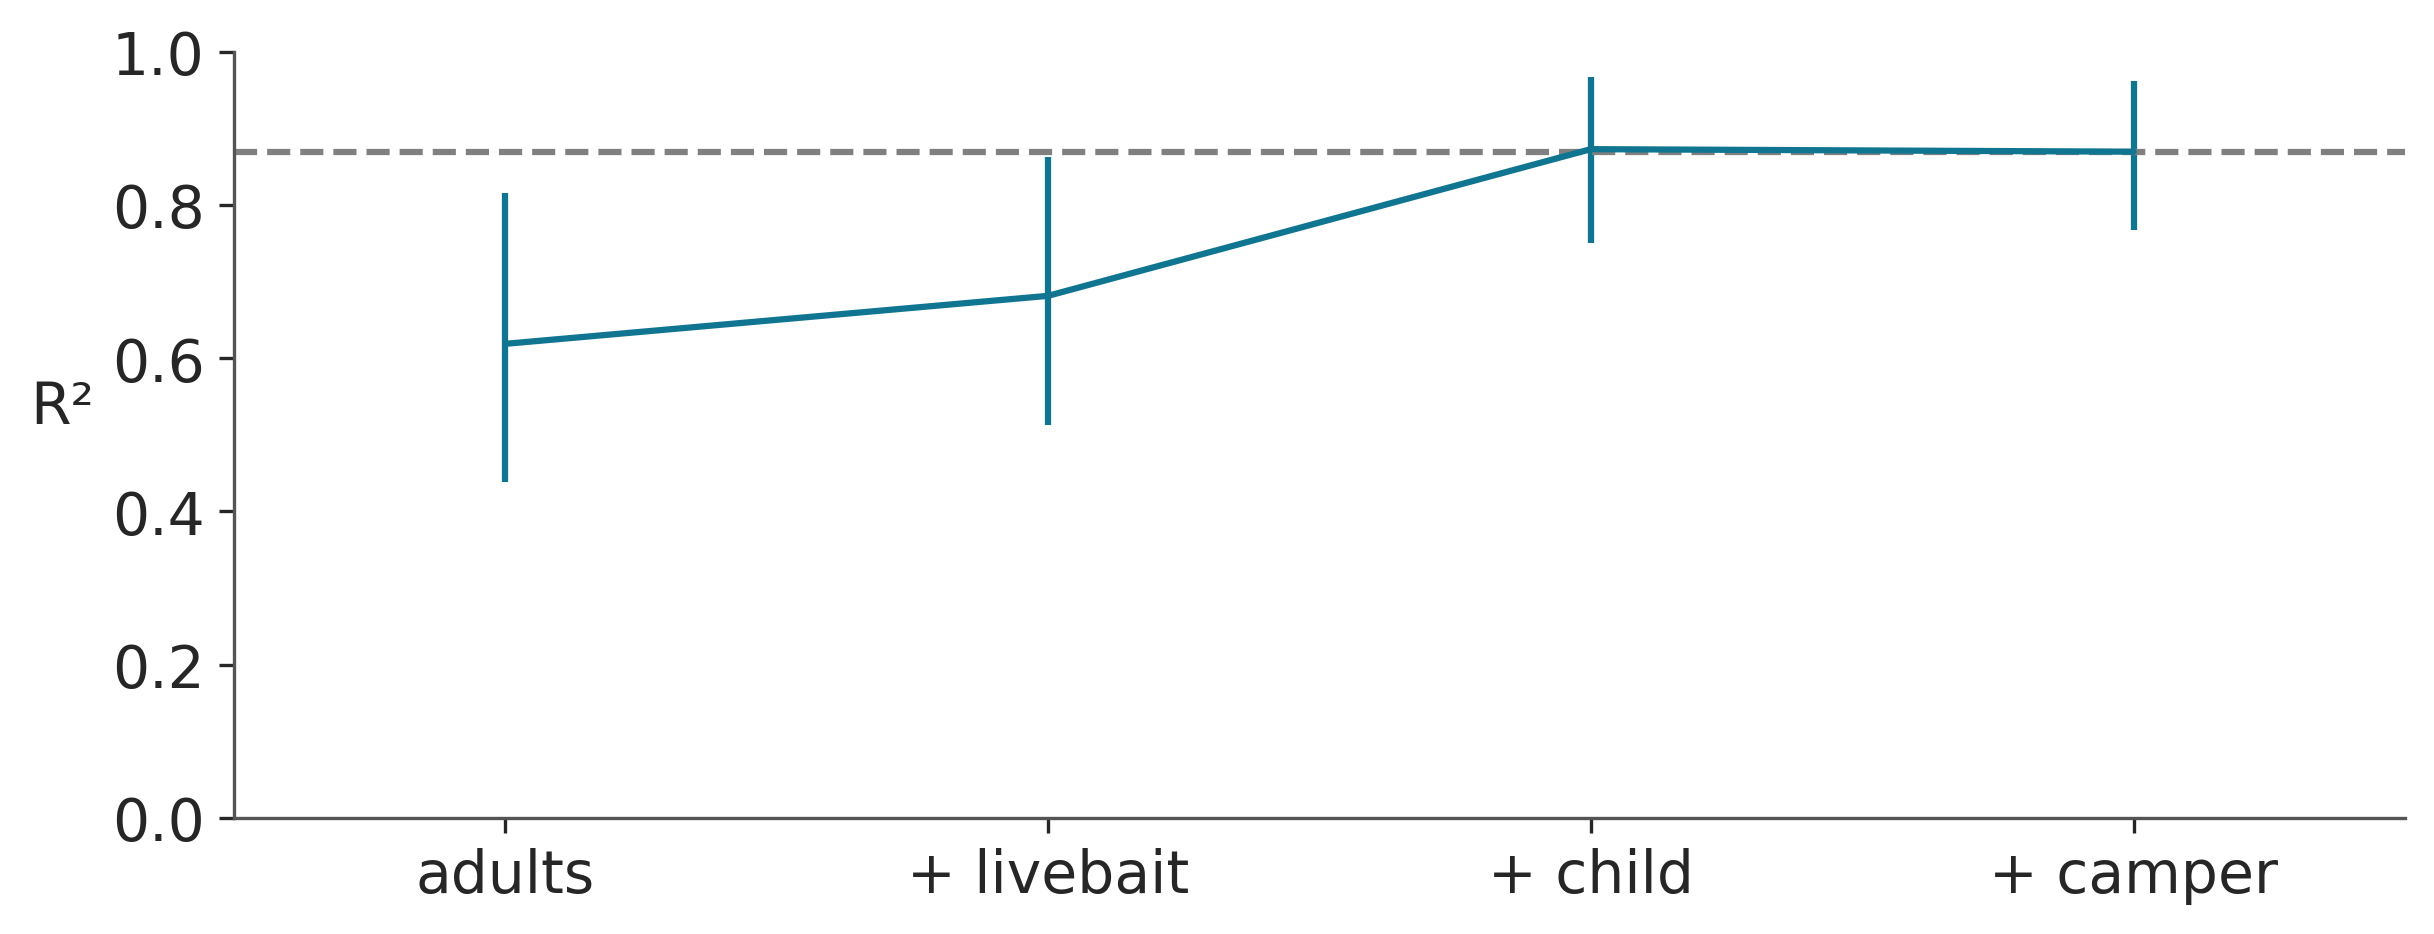

In [26]:
pmb.plot_variable_importance(idata_ZIP_reg2_200, θ, X2)

([3, 2, 0, 1], <Axes: ylabel='R²'>)

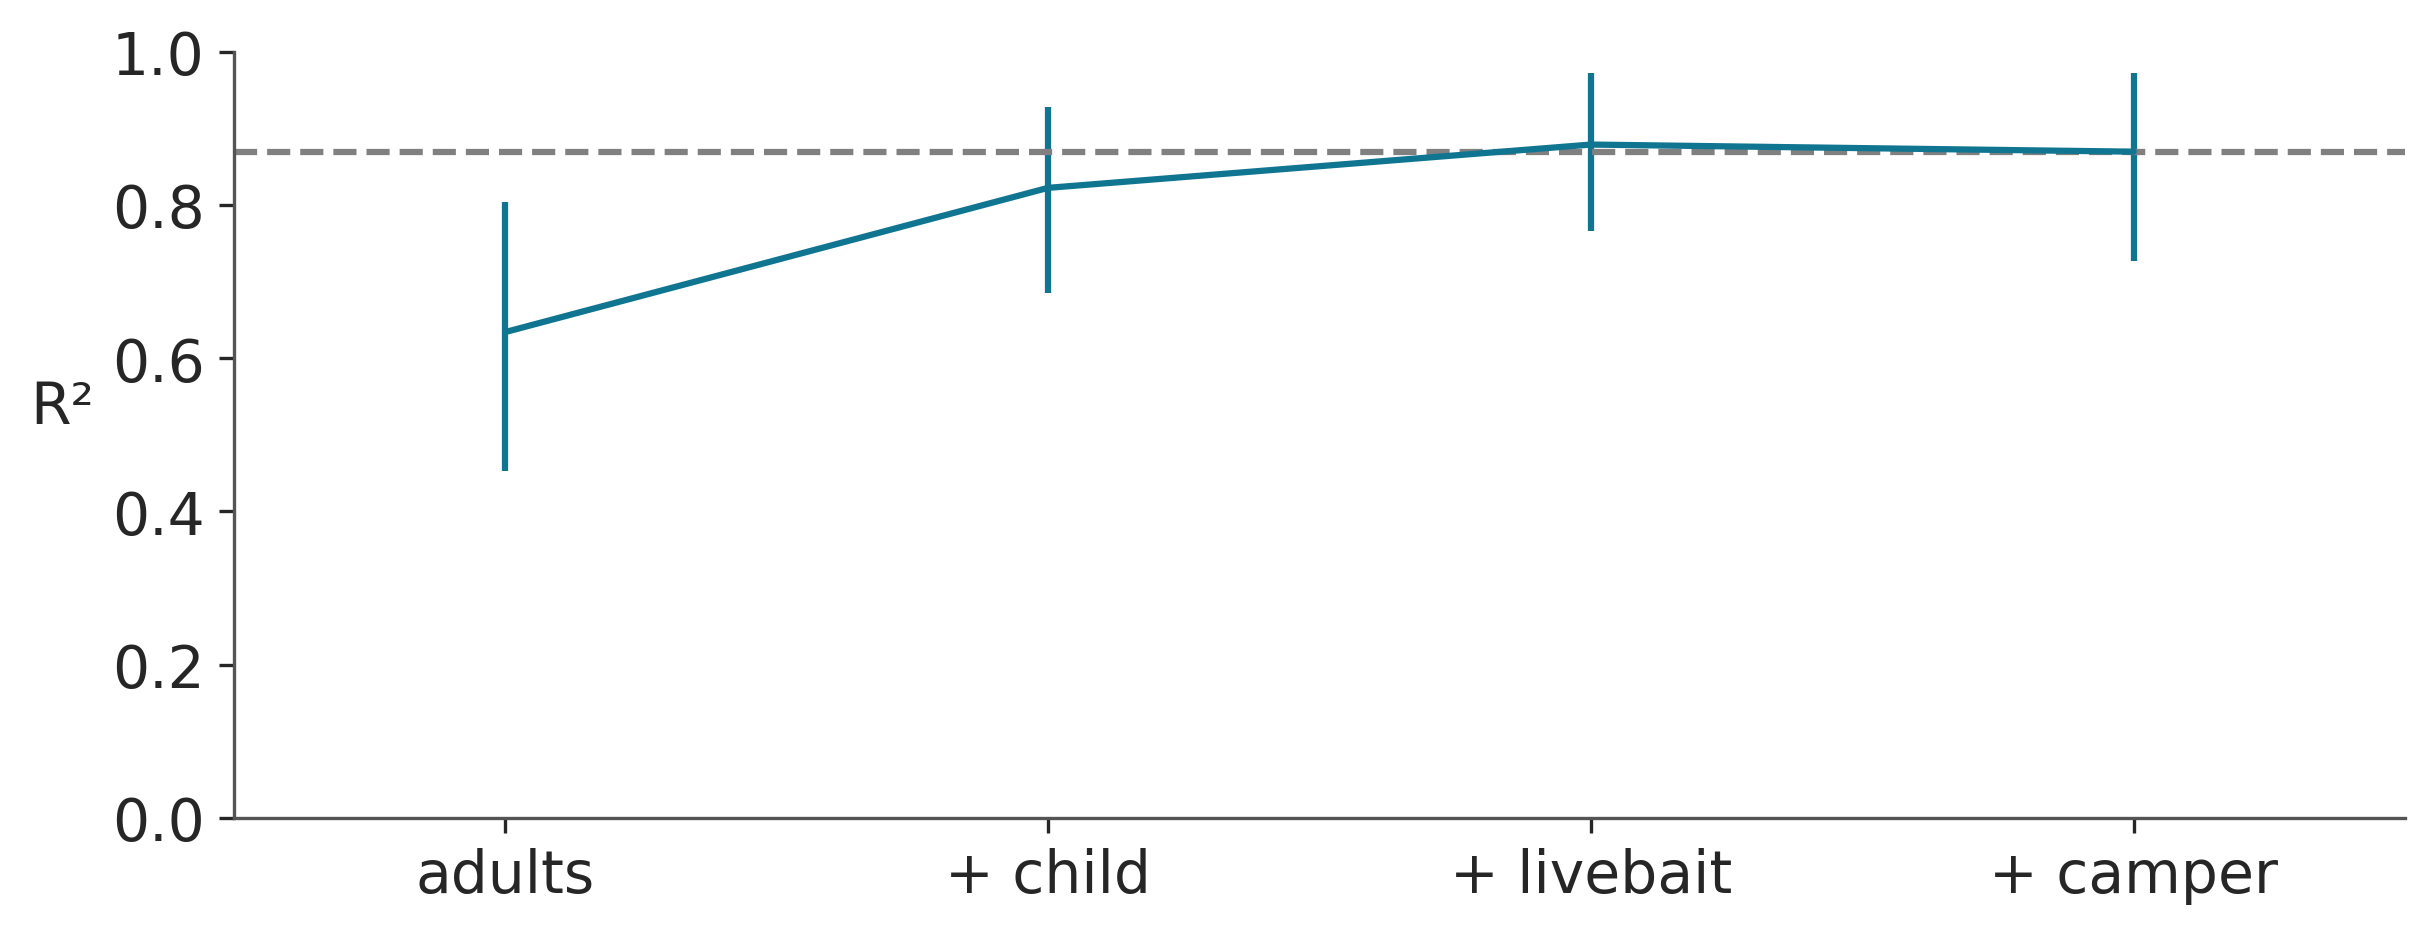

In [27]:
pmb.plot_variable_importance(idata_ZIP_reg2_200, θ, X2, method="backward")